# **Project Name**    -  **Mobile Price Range Prediction**



##### **Project Type**    - Classification
##### **Contribution**    - Individual


# **Project Summary -**

**Data Preprocessing** : 

1. Getting the dataset
2. Importing libraries
3. Importing datasets
4. Finding Missing Data
5. Encoding Categorical Data
6. Data Cleaning and Feature Engineering

**Exploratory data analysis(EDA) :** 

1.Firstly Checked correlation between Each Features in dataset.

2.Checked if bluetooth and wifi available or not???

3.Checked can Battery Power be affected in mobile Price?? and how the battery mAh is spread

4.Checked can Ram, Screen Height  ,Screen width,pixel Height ,pixel width be affected in mobile Price??

5.Checked can 4G and 3G be affected in mobile Price??

6.Checked can FC (front camera megapixels) ,PC (Primary camera Megapixels) and Mobile Weight affected in mobile Price??

**Supervise Machine learning algorithms and implementation :**

1. Logistic regression

2. Decision Tree Classifier

3. Random Forest Classifier

4. XG Boost Classifier







# **GitHub Link -**

[ML Mobile Price Range Prediction](https://github.com/manikaran21/Classification/blob/main/ML%20Mobile%20Price%20Range%20Prediction.ipynb)

# **Problem Statement**


**BUSINESS PROBLEM OVERVIEW**


In the competitive mobile phone market companies want to understand sales data of mobile phones and factors which drive the prices. The objective is to find out some relation between features of a mobile phone(eg:- RAM, Internal Memory, etc) and its selling price. In this problem, we do not have to predict the actual price but a price range indicating how high the price is .

# **General Guidelines** : -  

1.   Well-structured, formatted, and commented code is required. 
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits. 
     
     The additional credits will have advantages over other students during Star Student selection.
       
             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.
        

```
# Chart visualization code
```
            

*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 15 logical & meaningful charts having important insights.


[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule. 

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]





6. You may add more ml algorithms for model creation. Make sure for each and every algorithm, the following format should be answered.


*   Explain the ML Model used and it's performance using Evaluation metric Score Chart.


*   Cross- Validation & Hyperparameter Tuning

*   Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

*   Explain each evaluation metric's indication towards business and the business impact pf the ML model used.




















# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [ ]:
# importing  all necessary libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import StackingClassifier
from sklearn.impute import SimpleImputer
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import GridSearchCV

import warnings
warnings.filterwarnings("ignore")

### Dataset Loading

In [ ]:
# Mounting the drive

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Loading the dataset

dataset = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Classification/data_mobile_price_range.csv')


### Dataset First View

In [ ]:
# Dataset First 
dataset.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


### Dataset Rows & Columns count

In [ ]:
# Dataset Rows & Columns 
dataset.shape

(2000, 21)

### Dataset Information

In [ ]:
# Dataset Info
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

#### Duplicate Values

In [ ]:
# Dataset Duplicate Value Count
len(dataset[dataset.duplicated()])

0

#### Missing Values/Null Values

In [ ]:
# Missing Values/Null Values Count
print(dataset.isnull().sum())

battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
price_range      0
dtype: int64


<Axes: >

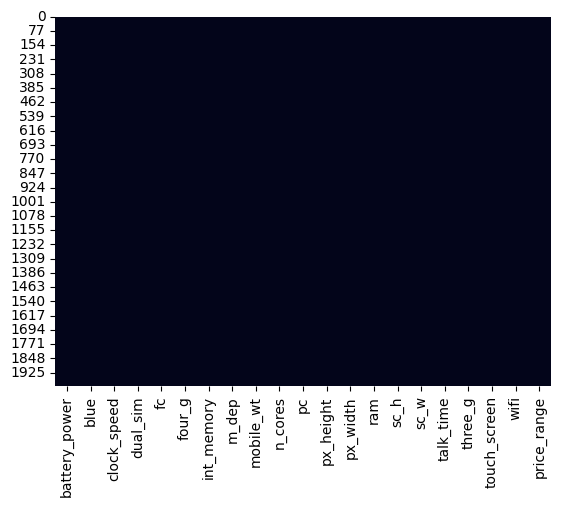

In [ ]:
# Visualizing the missing values
# Checking Null Value by plotting Heatmap
sns.heatmap(dataset.isnull(), cbar=False)

### What did you know about your dataset?

The given dataset Mobile Price Range is a collection of mobile phone specifications and prices. The dataset contains 20 attributes such as battery power, RAM, internal memory, screen size, 4G support, and price range. The dataset includes 2,000 mobile phone models from various manufacturers, including Apple, Samsung, Xiaomi, and others.

## ***2. Understanding Your Variables***

In [ ]:
# Dataset Columns
dataset.columns

Index(['battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc', 'four_g',
       'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height',
       'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g',
       'touch_screen', 'wifi', 'price_range'],
      dtype='object')

In [ ]:
# Dataset Describe
dataset.describe(include='all').T

,count,mean,std,min,25%,50%,75%,max
battery_power,2000.0,1238.51850,439.418206,501.0,851.75,1226.0,1615.25,1998.0
blue,2000.0,0.49500,0.500100,0.0,0.00,0.0,1.00,1.0
clock_speed,2000.0,1.52225,0.816004,0.5,0.70,1.5,2.20,3.0
dual_sim,2000.0,0.50950,0.500035,0.0,0.00,1.0,1.00,1.0
fc,2000.0,4.30950,4.341444,0.0,1.00,3.0,7.00,19.0
four_g,2000.0,0.52150,0.499662,0.0,0.00,1.0,1.00,1.0
int_memory,2000.0,32.04650,18.145715,2.0,16.00,32.0,48.00,64.0
m_dep,2000.0,0.50175,0.288416,0.1,0.20,0.5,0.80,1.0
mobile_wt,2000.0,140.24900,35.399655,80.0,109.00,141.0,170.00,200.0
n_cores,2000.0,4.52050,2.287837,1.0,3.00,4.0,7.00,8.0


### Variables Description 

* **Battery_power** - Total energy a battery can store in one time measured in mAh
* **Blue** - Has bluetooth or not
* **Clock_speed** - speed at which microprocessor executes instructions
* **Dual_sim** - Has dual sim support or not
* **Fc** - Front Camera mega pixels
* **Four_g** - Has 4G or not
* **Int_memory** - Internal Memory in Gigabytes
* **M_dep** - Mobile Depth in cm
* **Mobile_wt** - Weight of mobile phone
* **N_cores** - Number of cores of processor
* **Pc** - Primary Camera mega pixels
* **Px_heigh**t - Pixel Resolution Height
* **Px_width** - Pixel Resolution Width
* **Ram** - Random Access Memory in Mega
* **Touch_screen** - Has touch screen or not
* **Wifi** - Has wifi or not
* **Sc_h** - Screen Height of mobile in cm
* **Sc_w** - Screen Width of mobile in cm
* **Talk_time** - longest time that a single battery charge will last when you are
* **Three_g** - Has 3G or not
* **Wifi** - Has wifi or not
* **Price_range** - This is the target variable with value of 0(low cost), 1(medium cost),2(high cost) and 3 (very high cost)

### Check Unique Values for each variable.

In [ ]:
# Check Unique Values for each variable.
for i in dataset.columns.tolist():
  print("No. of unique values in ",i,"is",dataset[i].nunique(),".")

No. of unique values in  battery_power is 1094 .
No. of unique values in  blue is 2 .
No. of unique values in  clock_speed is 26 .
No. of unique values in  dual_sim is 2 .
No. of unique values in  fc is 20 .
No. of unique values in  four_g is 2 .
No. of unique values in  int_memory is 63 .
No. of unique values in  m_dep is 10 .
No. of unique values in  mobile_wt is 121 .
No. of unique values in  n_cores is 8 .
No. of unique values in  pc is 21 .
No. of unique values in  px_height is 1137 .
No. of unique values in  px_width is 1109 .
No. of unique values in  ram is 1562 .
No. of unique values in  sc_h is 15 .
No. of unique values in  sc_w is 19 .
No. of unique values in  talk_time is 19 .
No. of unique values in  three_g is 2 .
No. of unique values in  touch_screen is 2 .
No. of unique values in  wifi is 2 .
No. of unique values in  price_range is 4 .


## 3. ***Data Wrangling***

### Data Wrangling Code

In [ ]:
df = dataset.copy()

Minimum value of px_height and sc_w cannot be zero so we need to handle that

In [ ]:
# Total phones with sc_w = 0
print(len(df[df.sc_w == 0]))
# Total phones with px_height = 0
print(len(df[df.px_height == 0]))

180
2


In [ ]:
df['sc_w'][df[df.sc_w == 0].index] = df.sc_w.mean()
df['px_height'][df[df.px_height == 0].index] = df.px_height.mean()
     

In [ ]:
#checking whether there is null values or not
df.isnull().sum()

battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
price_range      0
dtype: int64

In [ ]:
df.columns

Index(['battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc', 'four_g',
       'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height',
       'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g',
       'touch_screen', 'wifi', 'price_range'],
      dtype='object')

In [ ]:
#1 Average battery power with respect to price range 
df.groupby('price_range')['battery_power'].mean()

price_range
0    1116.902
1    1228.868
2    1228.320
3    1379.984
Name: battery_power, dtype: float64

In [ ]:
#2 Bluetooth support vs price range
df.groupby(['blue','price_range'])['price_range'].mean()

blue  price_range
0     0              0.0
      1              1.0
      2              2.0
      3              3.0
1     0              0.0
      1              1.0
      2              2.0
      3              3.0
Name: price_range, dtype: float64

In [ ]:
#3 Average of clockspeed with respect to price range
df[df['clock_speed']<df['clock_speed'].mean()].groupby('price_range')['clock_speed'].mean().reset_index()

,price_range,clock_speed
0,0,0.792400
1,1,0.826667
2,2,0.849225
3,3,0.859160


In [ ]:
#4 Dual sim support vs price range
df.groupby('dual_sim')['price_range'].mean().reset_index()

,dual_sim,price_range
0,0,1.480122
1,1,1.519136


In [ ]:
#5 Front camera pixcels with respect to price range
df[df['fc']<df['fc'].mean()].groupby('price_range')['fc'].mean().reset_index()

,price_range,fc
0,0,1.353698
1,1,1.315789
2,2,1.346154
3,3,1.480645


In [ ]:
#6 Four_g support vs price range
df.groupby('four_g')['price_range'].mean().reset_index()

,four_g,price_range
0,0,1.482759
1,1,1.515820


In [ ]:
#7 Three_g support vs price range
df.groupby('three_g')['price_range'].mean().reset_index()

,three_g,price_range
0,0,1.452830
1,1,1.514773


In [ ]:
#8 Touch screen vs price range
df.groupby('touch_screen')['price_range'].mean().reset_index()

,touch_screen,price_range
0,0,1.534205
1,1,1.466203


In [ ]:
#9 Wifi support vs price range
df.groupby('wifi')['price_range'].mean().reset_index()

,wifi,price_range
0,0,1.478702
1,1,1.520710


In [ ]:
#10 Internal memory vs price range
df.groupby('price_range')['int_memory'].mean().reset_index()

,price_range,int_memory
0,0,31.174
1,1,32.116
2,2,30.920
3,3,33.976


In [ ]:
#11 Average mobile weight with respect to Price range
df.groupby('price_range')['mobile_wt'].mean().reset_index()

,price_range,mobile_wt
0,0,140.552
1,1,140.510
2,2,143.614
3,3,136.320


### What all manipulations have you done and insights you found?

According to my idea  , I did few manipulations on data and the following are the insights are found from data manipulations on given dataset .<br>

* As the battery power increases the price range also increases .
* Even bluetooth support not present few mobiles have high price range .
* As the clock speed increases the price also increases .
* There is little effect on the price range due to dual sim support .
* The front camera pixels , Ram are in creases the price range also increases .
* Most of the mobiles have three_g support than 4_g support .
* As the weight of the mobiles decreases the price range increases .


## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Chart - 1 - Bar plot on  Price range 

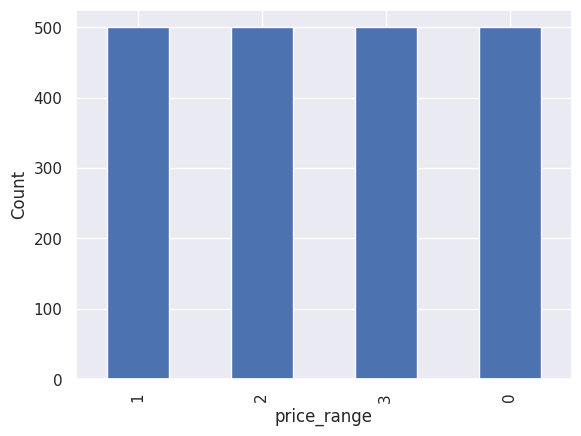

In [ ]:
#classes
sns.set()
price_plot=df['price_range'].value_counts().plot(kind='bar')
plt.xlabel('price_range')
plt.ylabel('Count')
plt.show()

##### 1. Why did you pick the specific chart?

Bar charts show the frequency counts of values for the different levels of a categorical or nominal variable. Sometimes, bar charts show other statistics, such as percentages.



##### 2. What is/are the insight(s) found from the chart?

From the above chart we can see ,
There are mobile phones in 4 price ranges. The number of elements is almost similar.

#### Chart - 2 - Count Plot on Categorical vs Price Range (Bivariate Categorical-Numerical)

In [ ]:
categorical_variables =['blue', 'dual_sim',  'four_g',
       'n_cores', 'three_g',
       'touch_screen', 'wifi']
categorical_variables

['blue', 'dual_sim', 'four_g', 'n_cores', 'three_g', 'touch_screen', 'wifi']

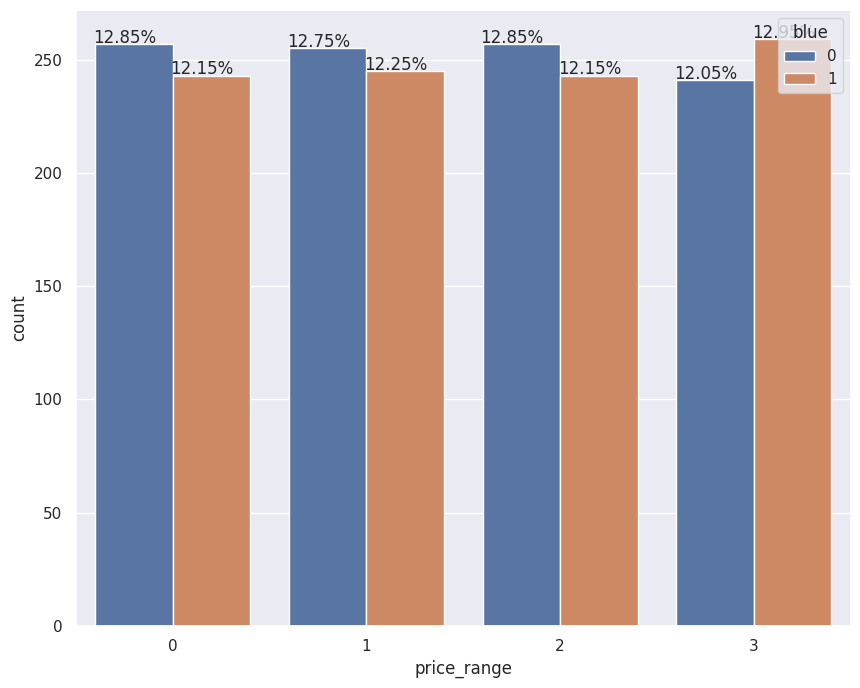

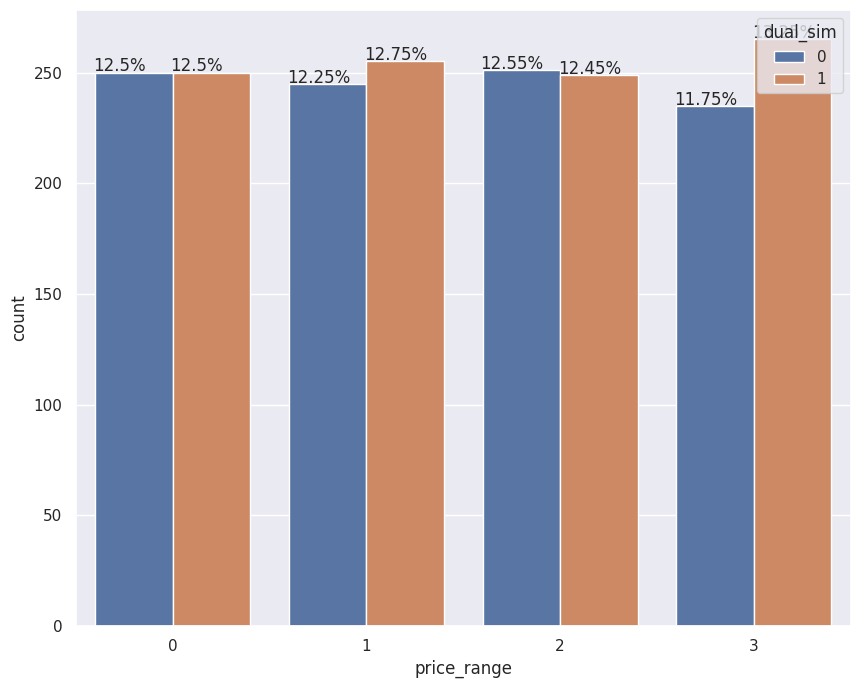

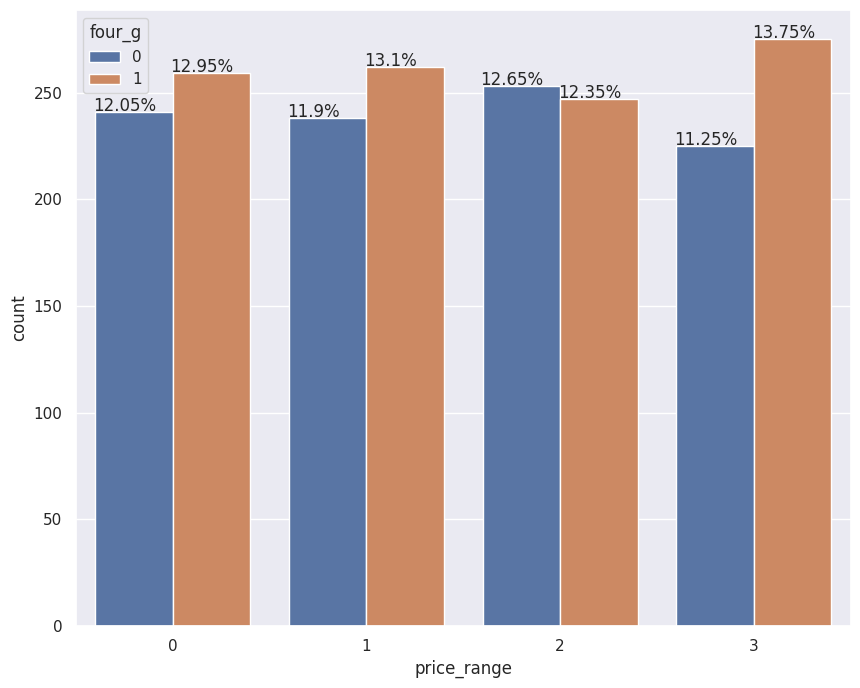

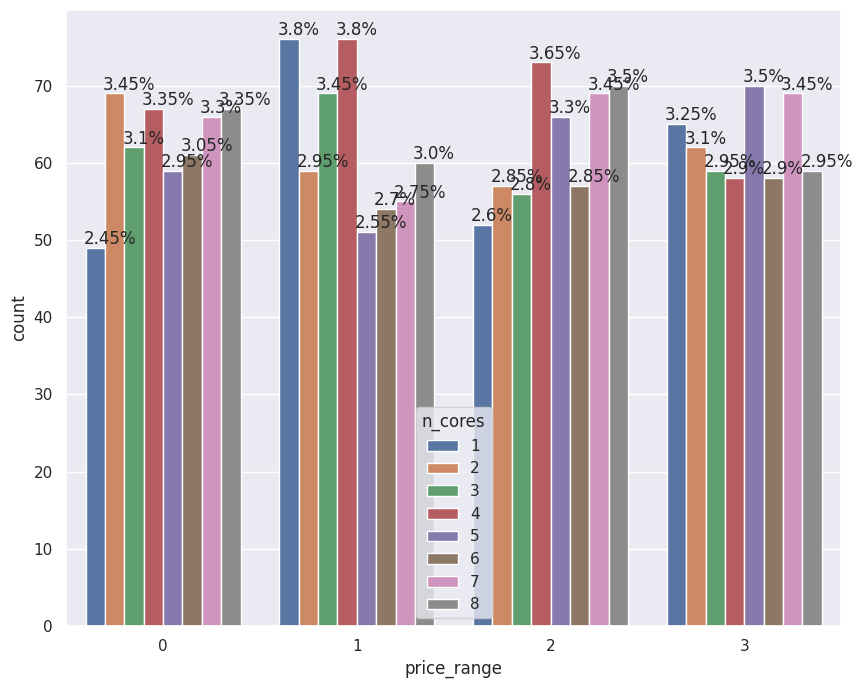

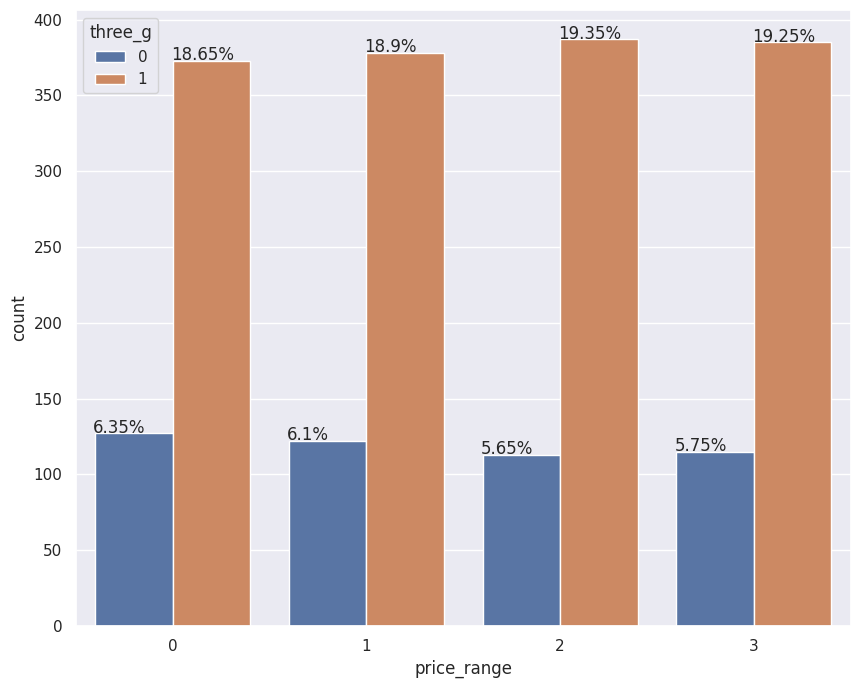

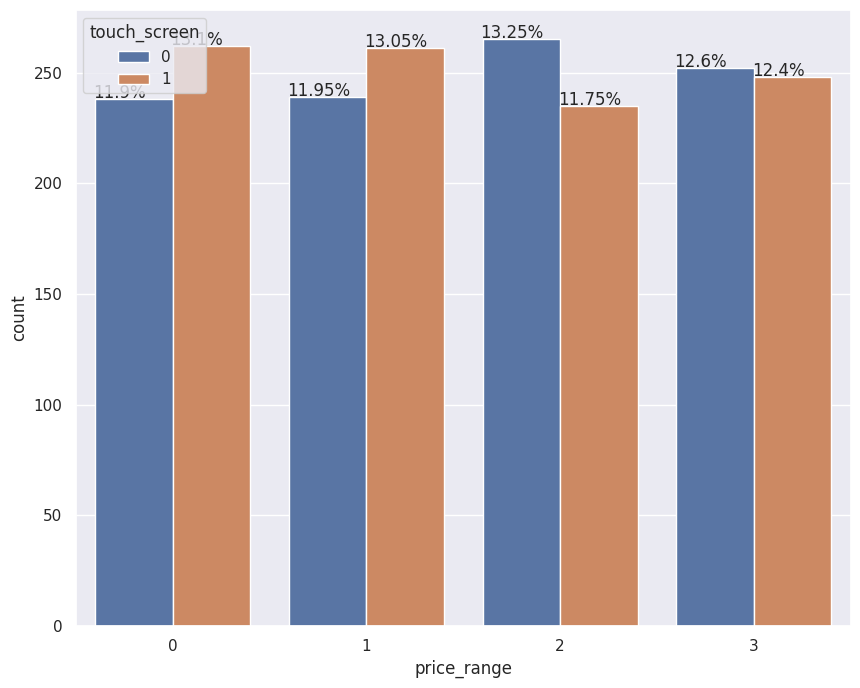

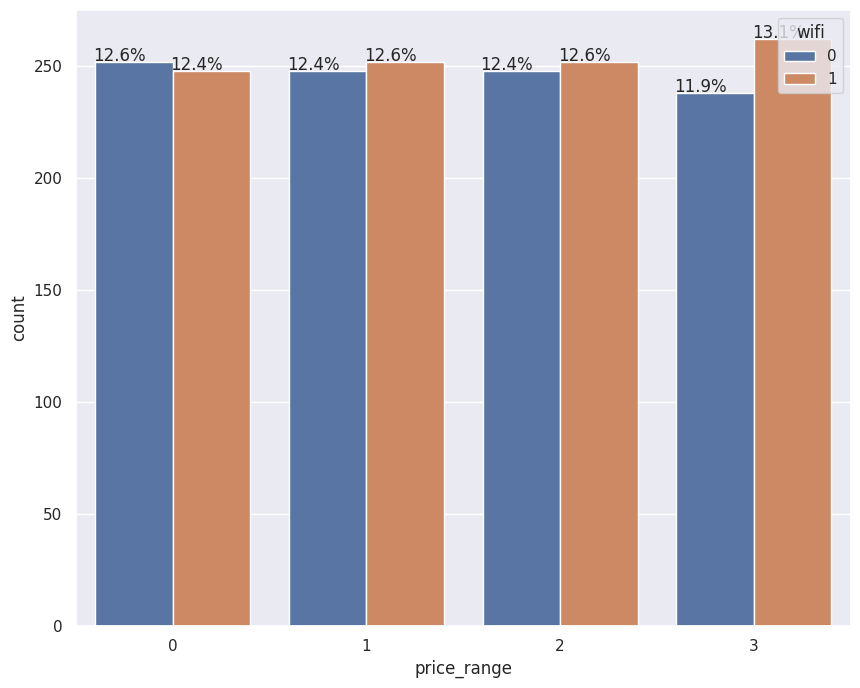

In [ ]:
# code for barplot of the categorical variables aganist sales .
# Iterating over the categorical variable plotting each of them .
for variable in categorical_variables:
    plt.figure(figsize=(10,8))
    ax = sns.countplot(x=df['price_range'],hue=df[variable])
    totals = []
    for i in ax.patches:
        totals.append(i.get_height())
    total = sum(totals)
    for i in ax.patches:  
      ax.text(i.get_x() - .01, i.get_height() + .5, \
              str(round((i.get_height()/total)*100, 2))+'%', fontsize=12)  #text position and formula for percentage
    plt.show()
    

##### 1. Why did you pick the specific chart?

countplot can count the number of occurrences of each category in a categorical variable and plot the counts as bars. This can help you quickly understand the distribution of the data and identify any imbalances or biases.<br>
countplot can also group the counts of different categories and plot them side-by-side, which allows you to compare the frequencies of different categories easily. This is useful when you want to compare the frequency of different categories across a dataset or between different datasets.

##### 2. What is/are the insight(s) found from the chart?

From the above chart we can see ,
* Most number of mobiles don't have bluetooth support which are in the price range of low and medium .
* Most number of mobiles have dual sim support .
* More number of mobiles have four_g support .
* In all price ranges of mobiles consists 4_cores more frequently .
*  75% of the mobiles have 3_g support .
*  The mobiles ratio which have touch screen to no touch screen is 1 .
* The mobiles ratio which have wifi support to no wifi support is 1 .




##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

**Positive Impact:**
* Most of the mobiles have all features like four_g support , 3_g support ,dual sim support .<br>

**Negative Impact:**
* Less number of mobiles have touch screen support and wifi support .



#### Chart - 3 - Bar plot on Dual Sim vs Price range  (Bivariate with Categorical - Numerical)

<Axes: xlabel='dual_sim', ylabel='price_range'>

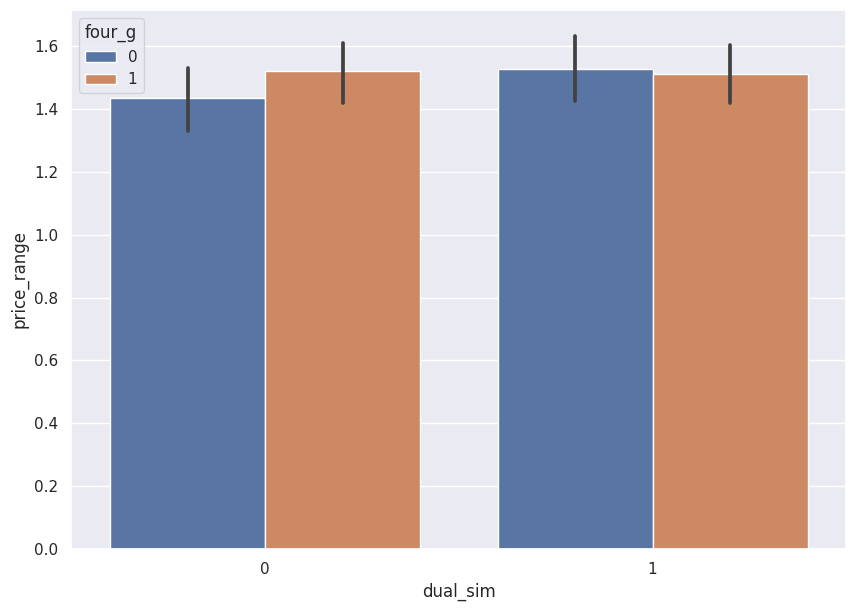

In [ ]:
# open and storetype relationship 
#this indicates - Open suggests that whether the store was open or closed for refurbishment and weekends or holidays
plt.figure(figsize=(10,7))
sns.barplot(x=df["dual_sim"],y=df['price_range'],hue=df["four_g"])

##### 1. Why did you pick the specific chart?

Bar charts show the frequency counts of values for the different levels of a categorical or nominal variable. Sometimes, bar charts show other statistics, such as percentages.



##### 2. What is/are the insight(s) found from the chart?

From the above chart we can see ,
The Range of the price is high where the mobile have four_g support and dual sim support .

#### Chart - 4 - Distplot on Numerical variables ( Univariate - Numerical )

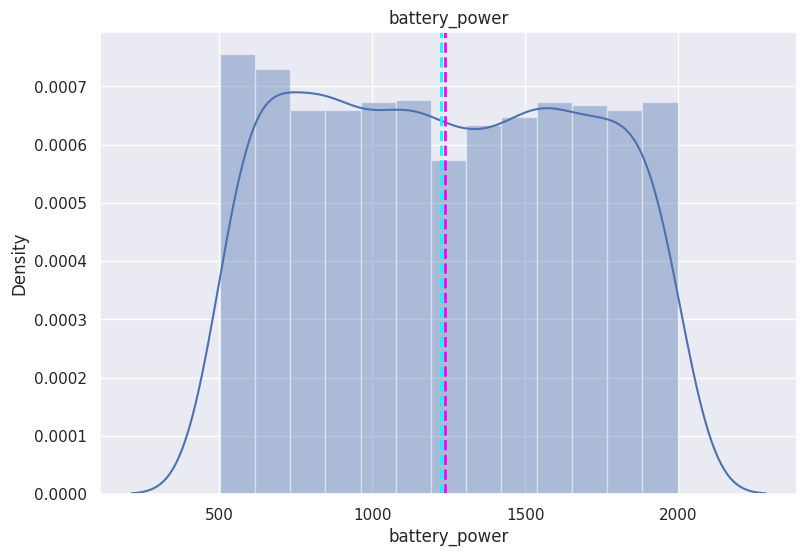

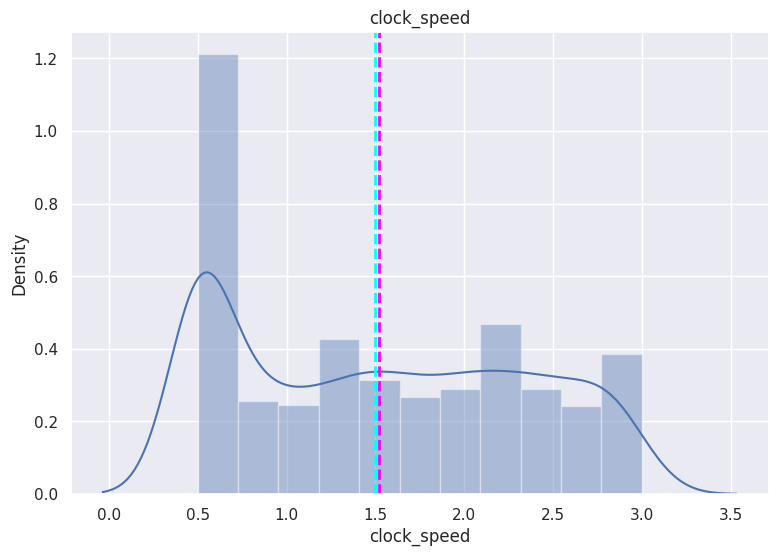

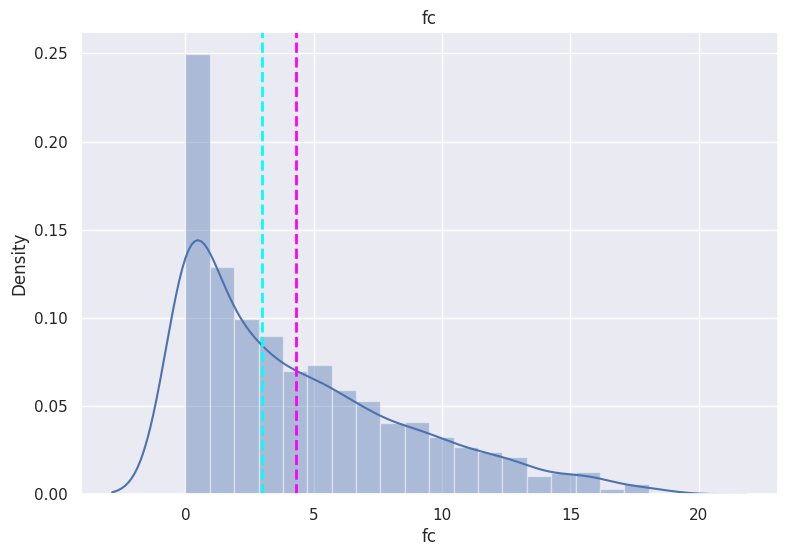

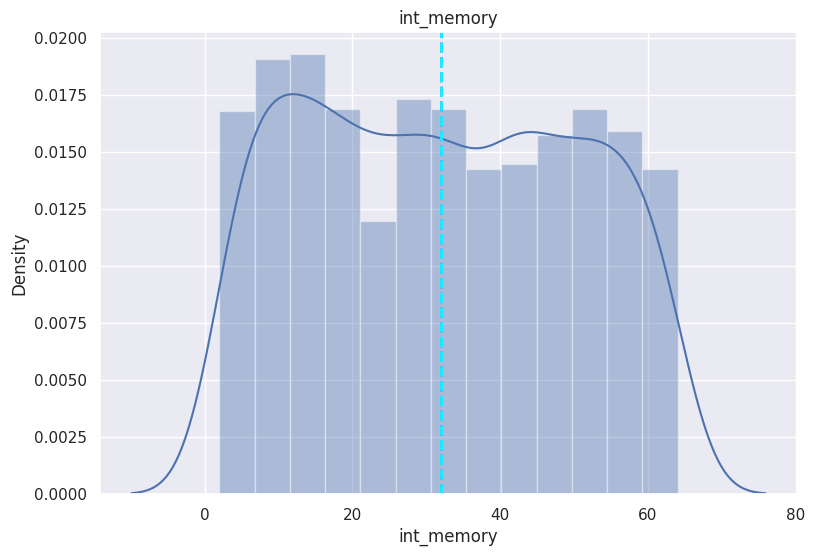

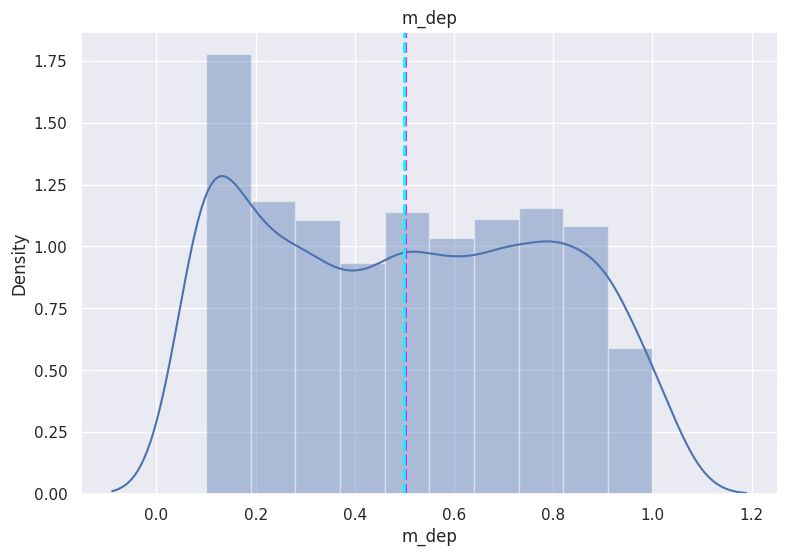

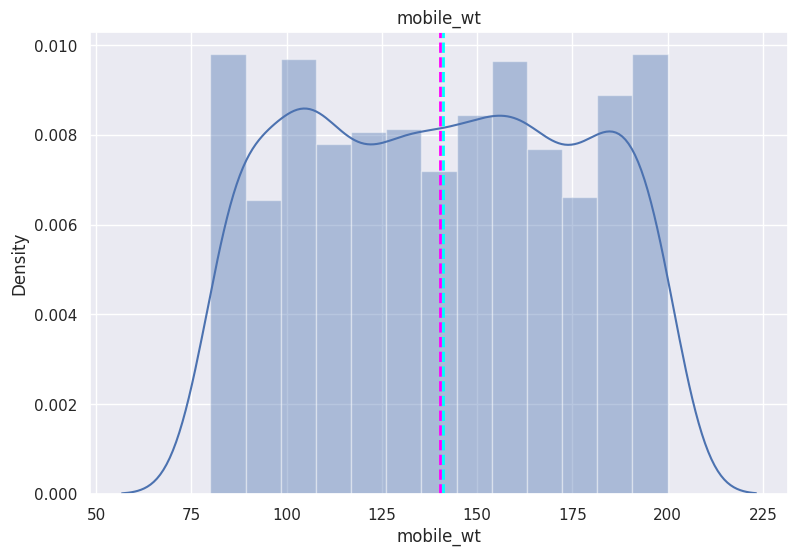

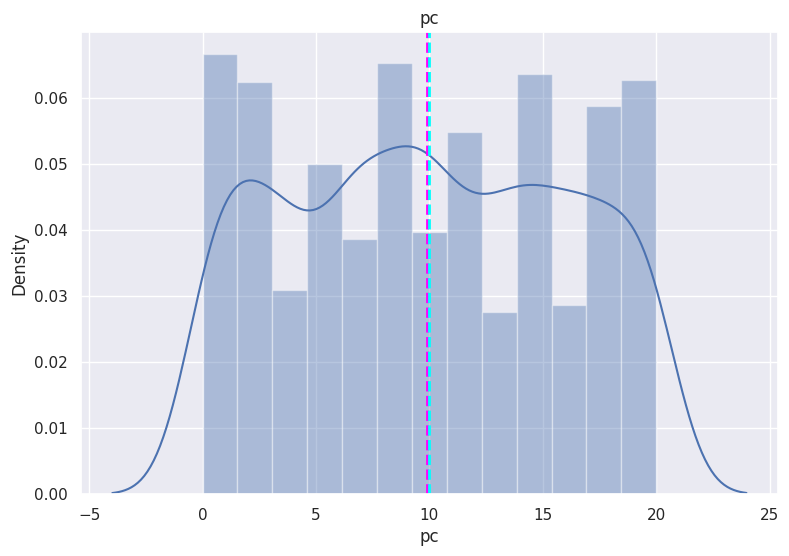

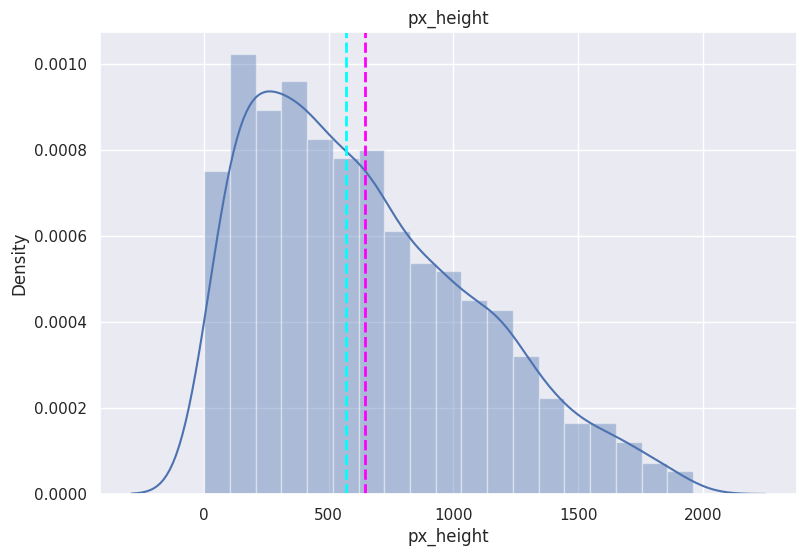

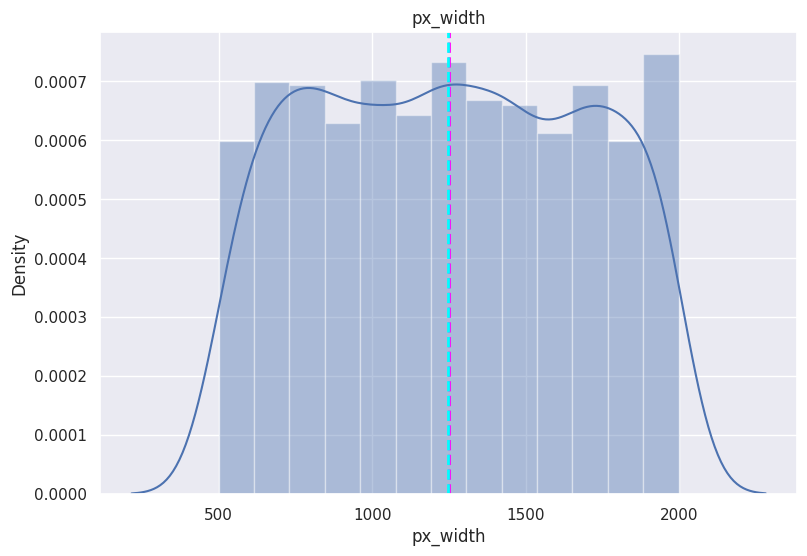

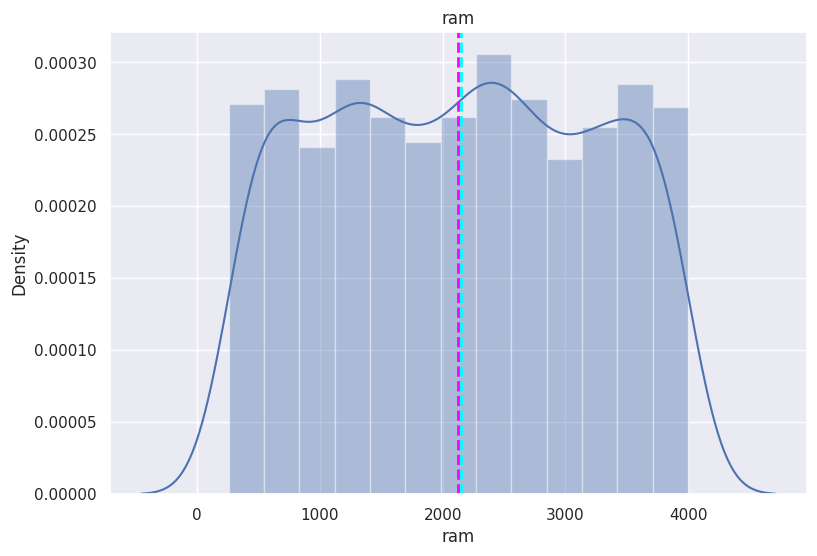

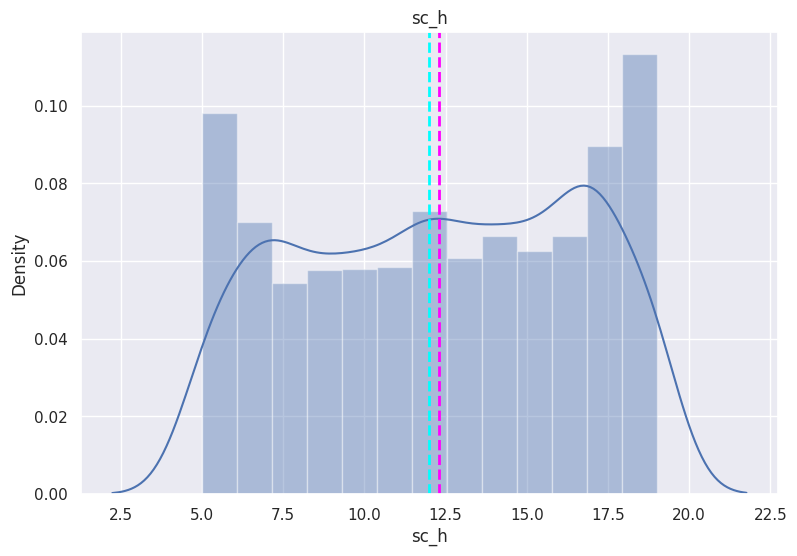

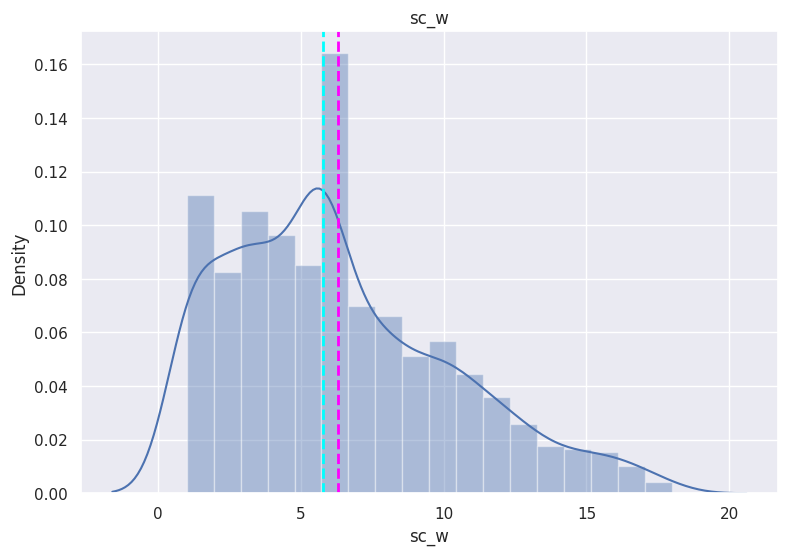

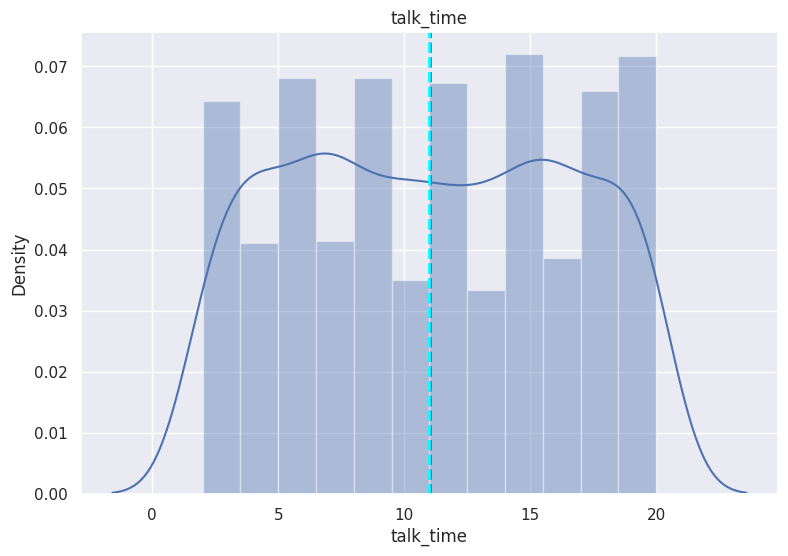

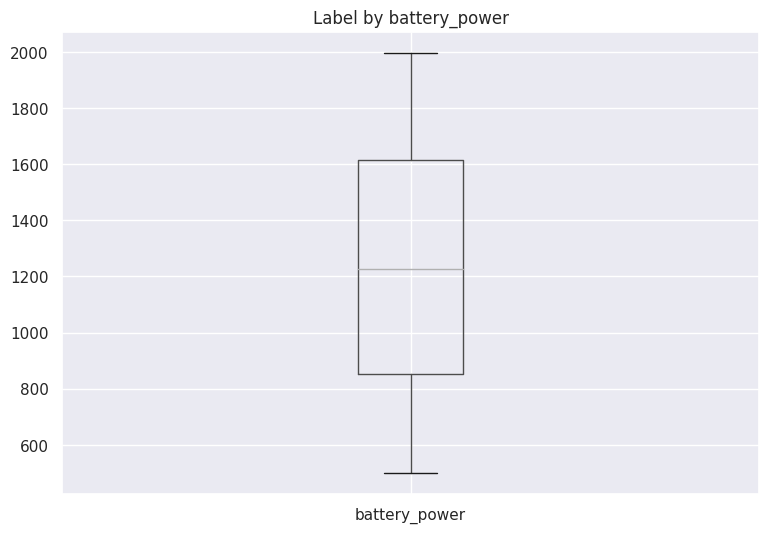

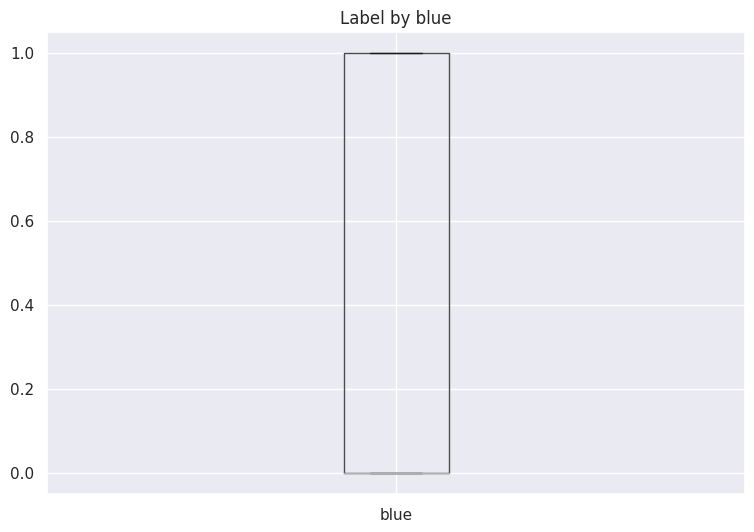

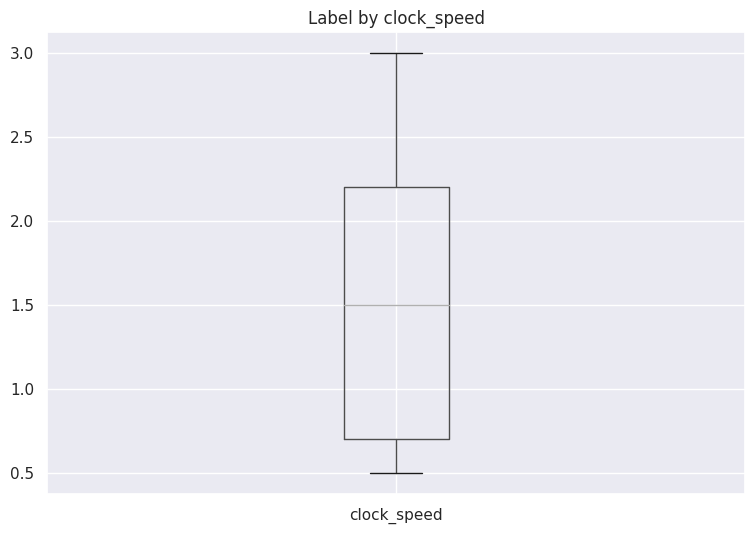

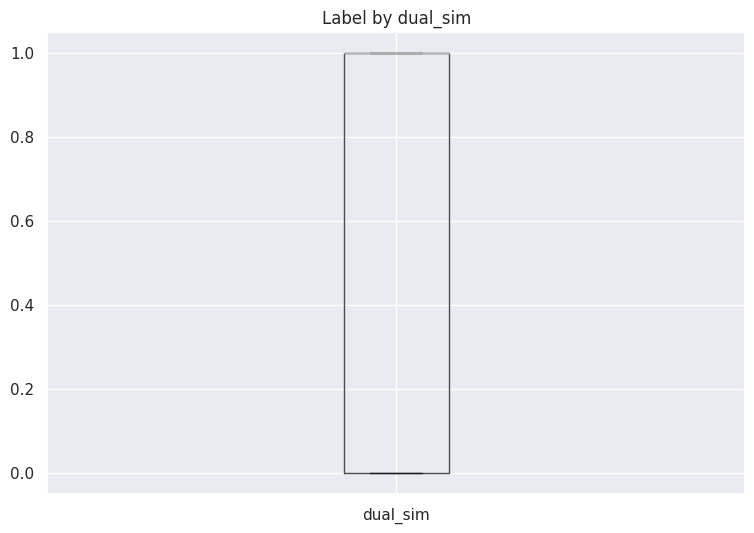

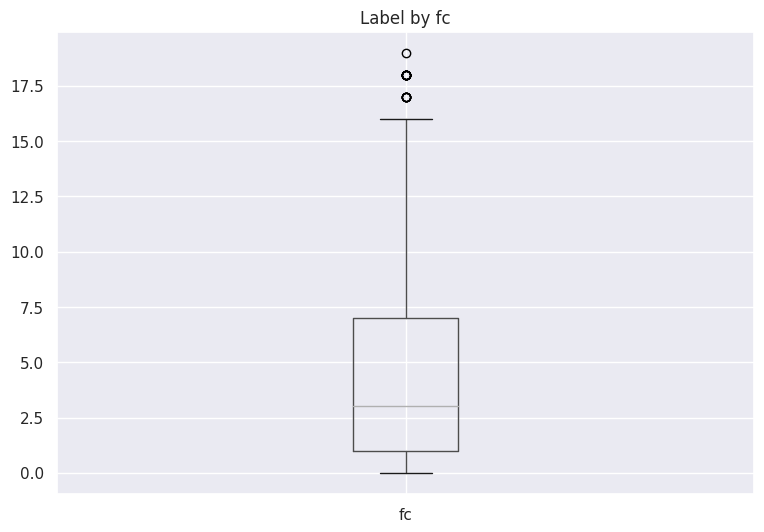

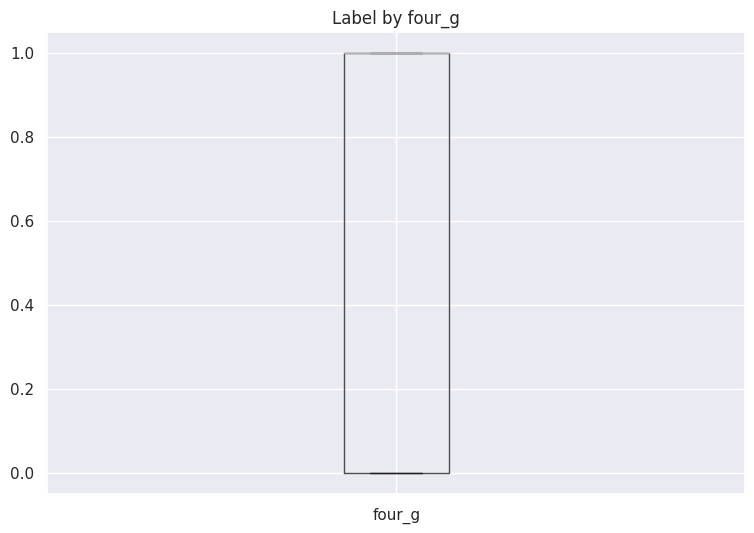

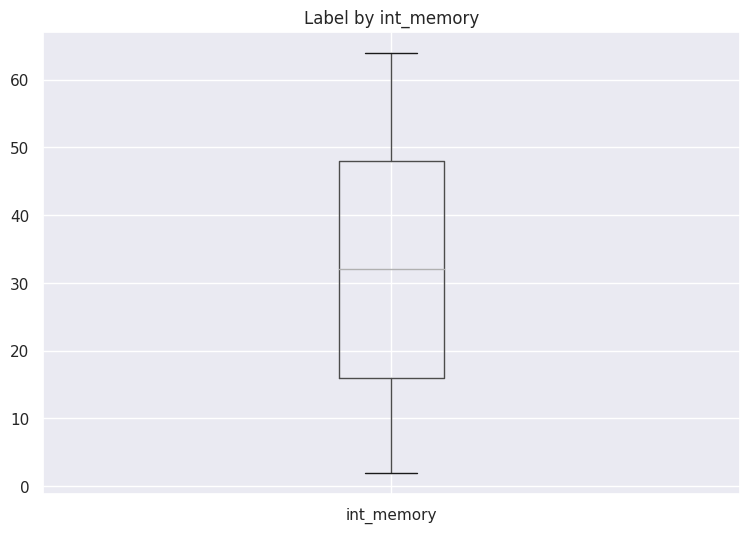

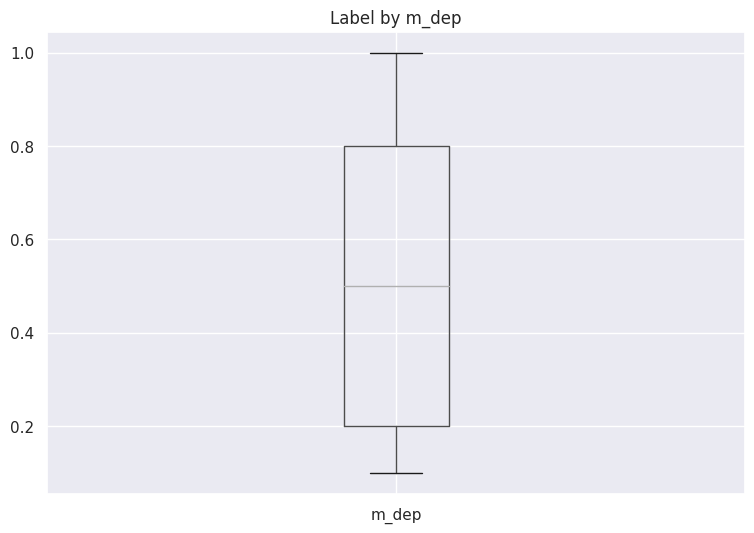

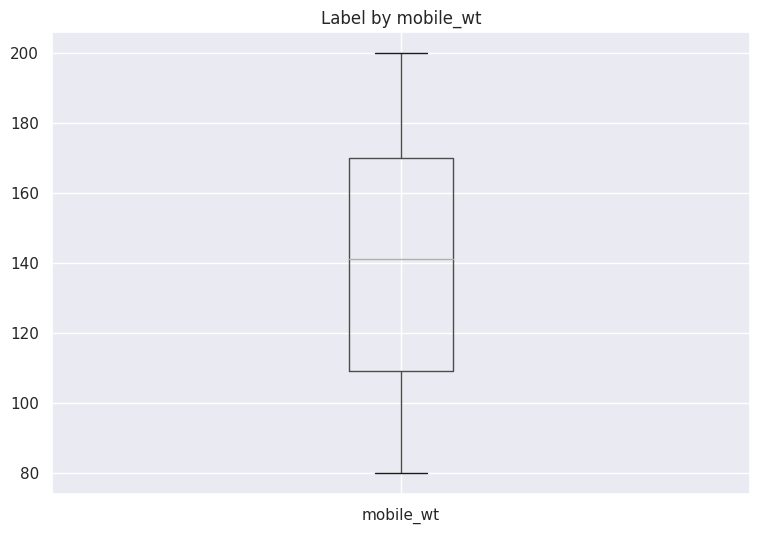

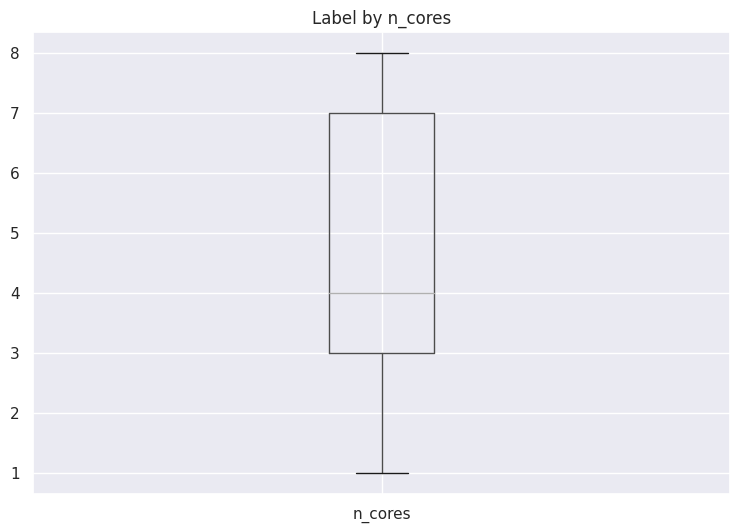

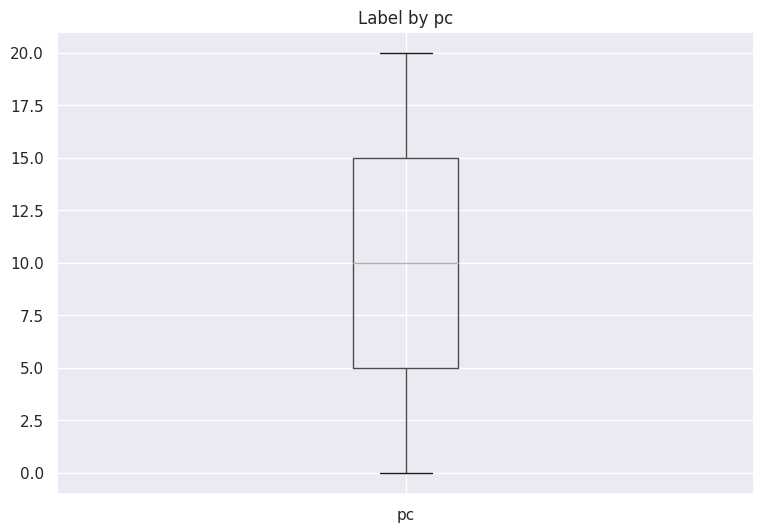

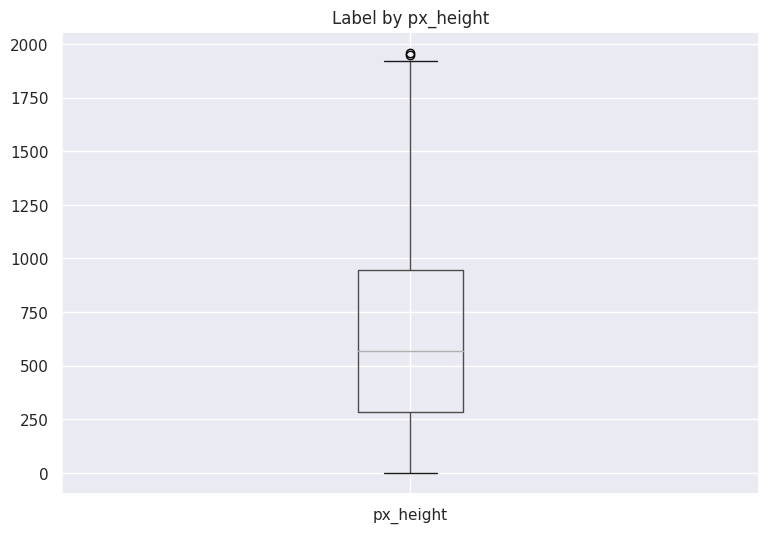

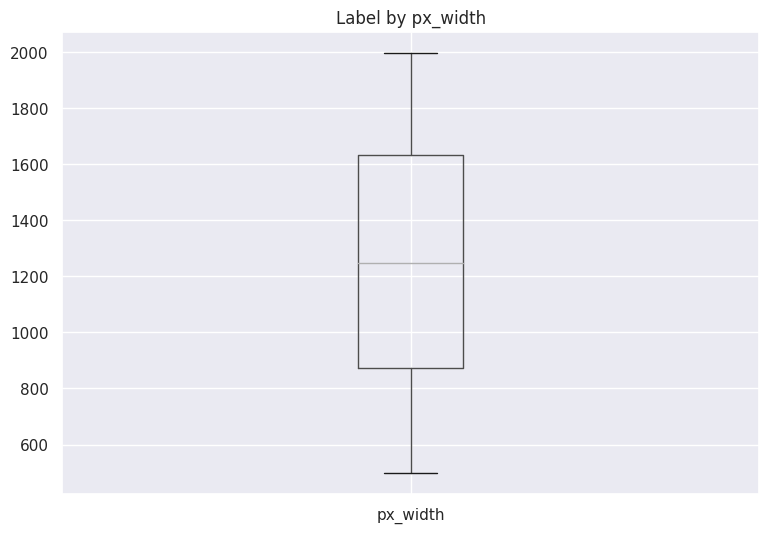

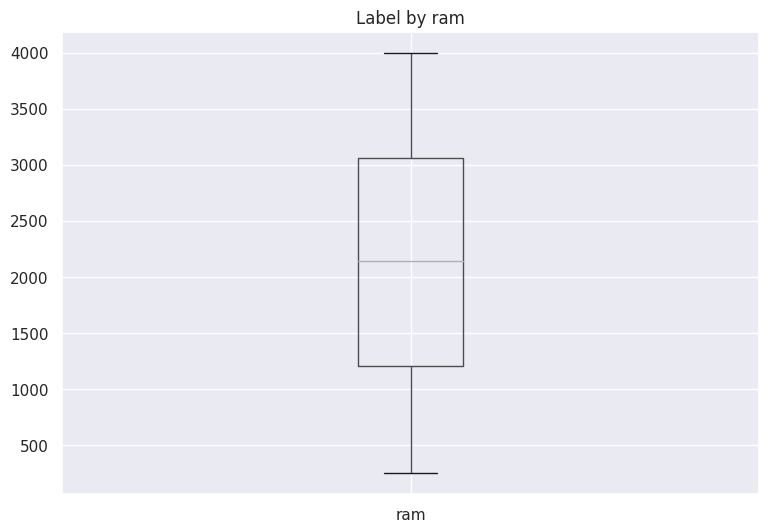

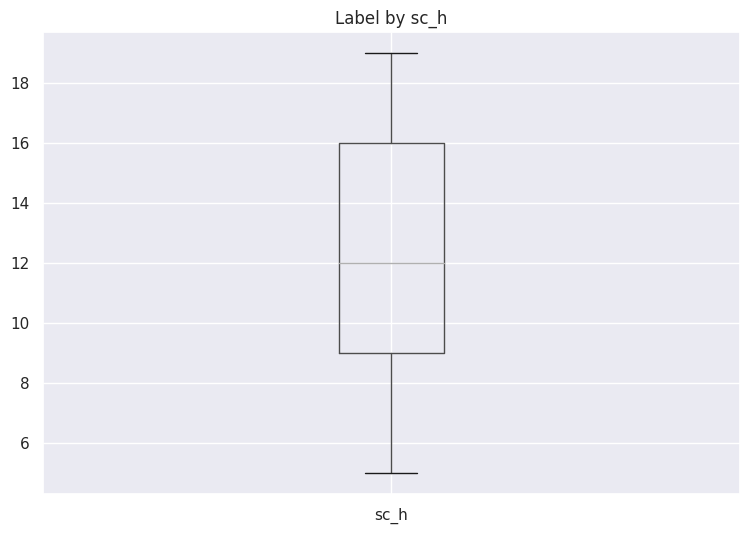

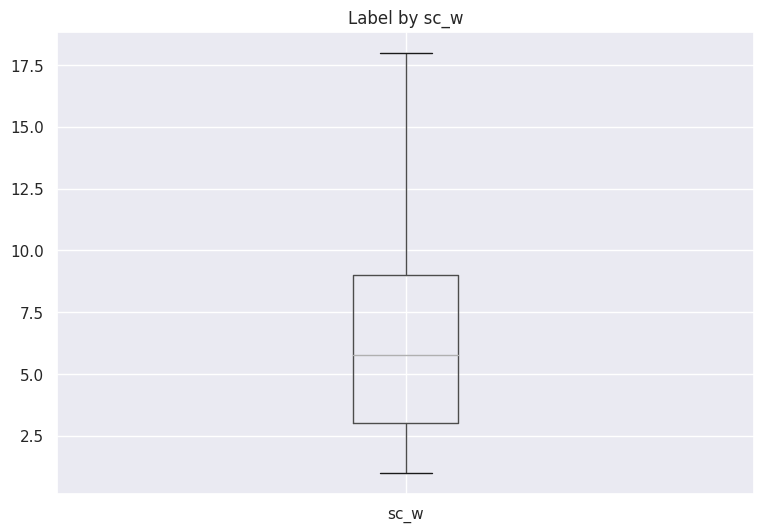

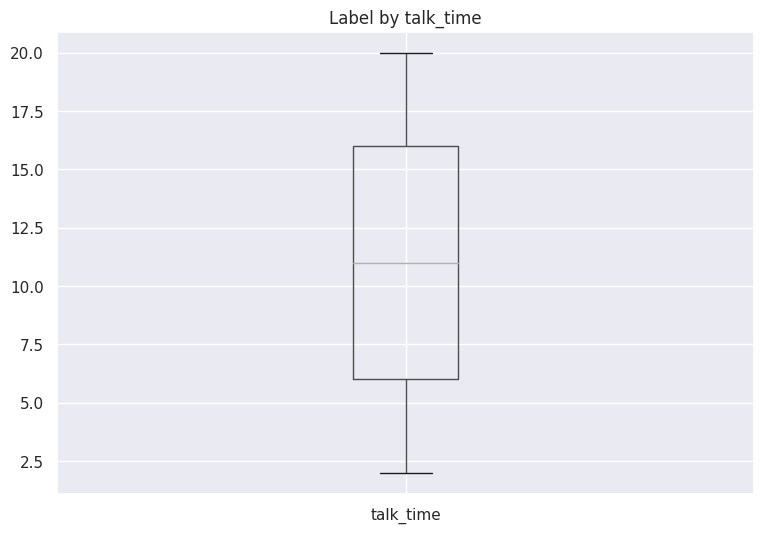

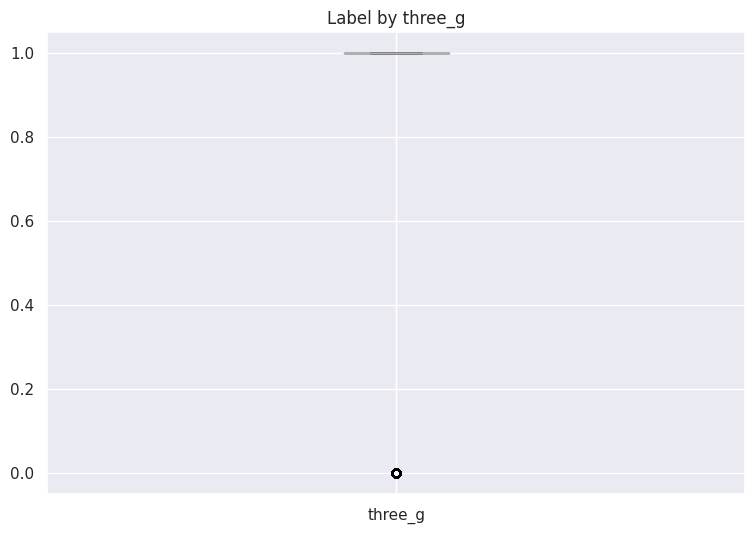

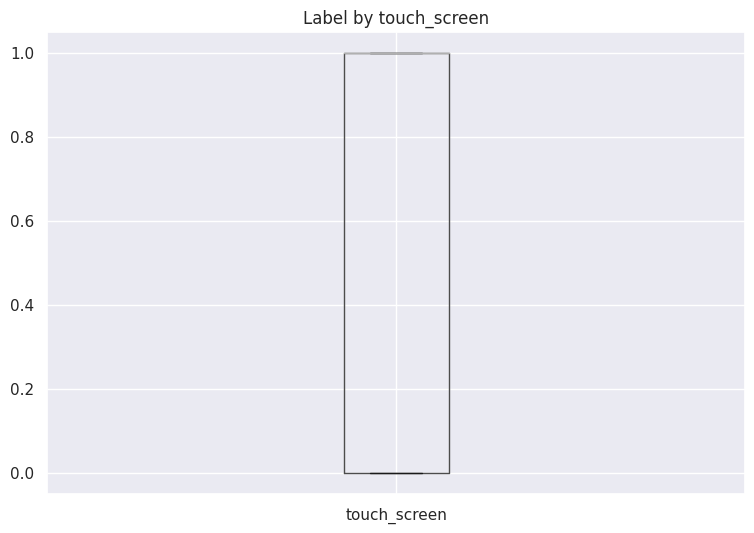

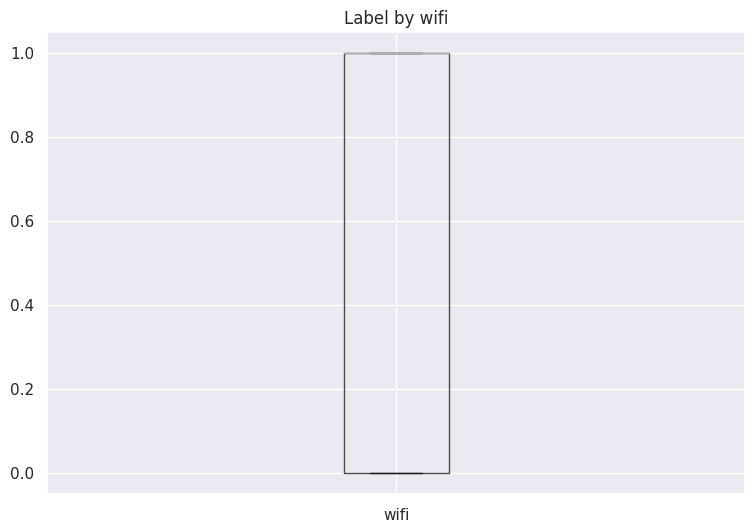

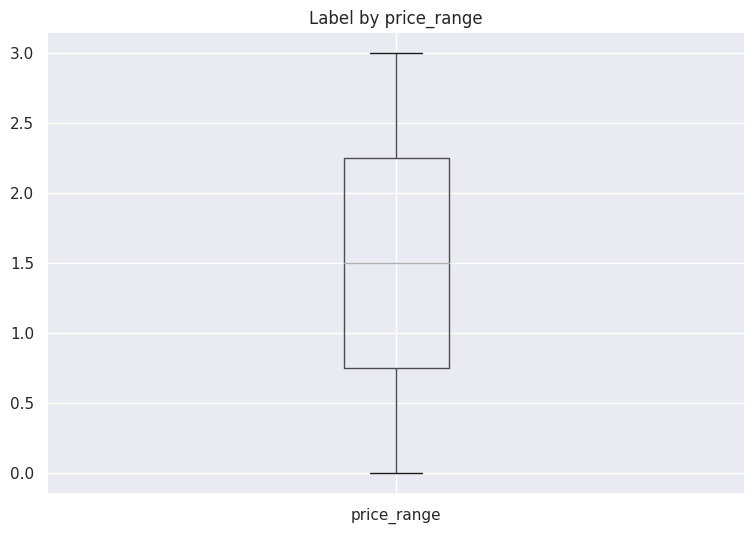

In [ ]:
# Chart - 9 visualization code
numerical_variables = ['battery_power',  'clock_speed',  'fc', 
       'int_memory', 'm_dep', 'mobile_wt', 'pc', 'px_height',
       'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 
       ]
# Visualizing code of hist plot for each columns to know the data distibution
for col in numerical_variables:
  fig=plt.figure(figsize=(9,6))
  ax=fig.gca()
  feature= (df[col])
  sns.distplot(df[col])
  ax.axvline(feature.mean(),color='magenta', linestyle='dashed', linewidth=2)
  ax.axvline(feature.median(),color='cyan', linestyle='dashed', linewidth=2)
  ax.set_title(col)
plt.show()

# Visualizing code of box plot for each columns to know the data distibution
for col in df.describe().columns:
    fig = plt.figure(figsize=(9, 6))
    ax = fig.gca()
    df.boxplot( col, ax = ax)
    ax.set_title('Label by ' + col)
    #ax.set_ylabel("Churn")
plt.show()

##### 1. Why did you pick the specific chart?

Distplot can plot the distribution of a continuous variable, which can help us quickly understand the shape of the distribution, such as whether it is symmetric or skewed, and the location of the central tendency, such as the mean or median.

##### 2. What is/are the insight(s) found from the chart?

From the above chart we can see ,
* Most number of mobiles have the battery power in the range of 500 mah to 2000 mah .
* Most of the mobiles have clock spedd 0.5s .
* Front camera pixels increses number of mobiles are decreases .
* Most number of mobiles have the internal memory in the range of 10 Gb to 60 Gb .
* Most number of mobiles have the weight in the range of 100 g to 200 g .
* Most number of mobiles have the primary camera in the range of 5px to 20px .
* Most number of mobiles have the Ram in the range of 1000mb to 5000 mb .
* Most number of mobiles have the talktime in the range of 5mto 20m .

* Almost all numerical variables don't have outliers .

#### Chart - 5 - Line Plot on Ram vs price range 

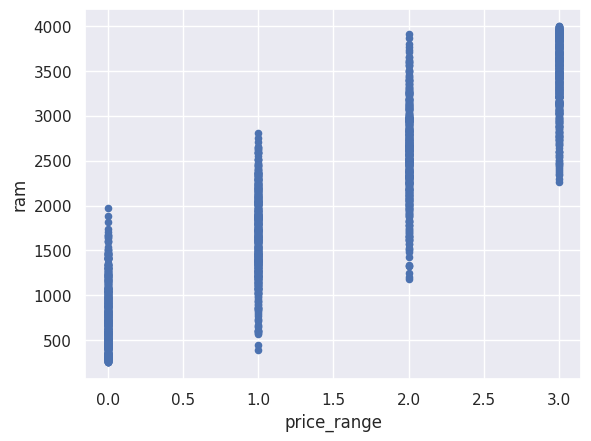

In [ ]:
df.plot(x='price_range',y='ram',kind='scatter')
plt.show()

##### 1. Why did you pick the specific chart?

Line plots are useful when you want to visualize the relationship between two variables that are continuous or ordered.
We can use a line plot to compare how different groups change over time or to compare the relationships between different groups.
We can use a line plot to highlight significant events or changes in your data by adding annotations or markers to the plot.

##### 2. What is/are the insight(s) found from the chart?

From the above chart we can say ,<br>
Ram has continuous increase with price range while moving from Low cost to Very high cost .

#### Chart - 6 - Line Plot on Price range vs  Front camera

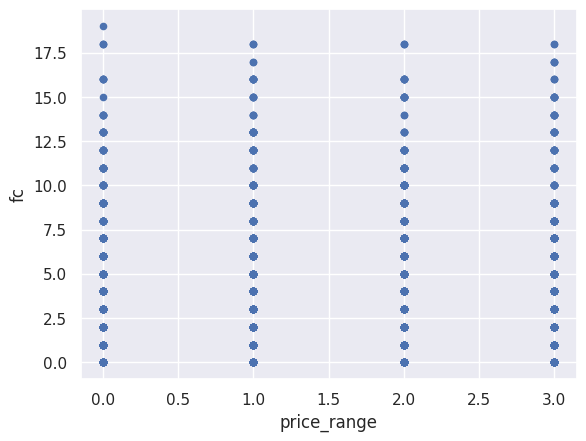

In [ ]:
df.plot(x='price_range',y='fc',kind='scatter')
plt.show()

##### 1. Why did you pick the specific chart?

Line plots are useful when you want to visualize the relationship between two variables that are continuous or ordered.
We can use a line plot to compare how different groups change over time or to compare the relationships between different groups.
We can use a line plot to highlight significant events or changes in your data by adding annotations or markers to the plot.

##### 2. What is/are the insight(s) found from the chart?

From the above chart we can say ,<br>
This features distribution is almost similar along all the price ranges variable, it may not be helpful in making predictions .

#### Chart - 6 - Scatter Plot  (Bivariate Numerical-Numerical)

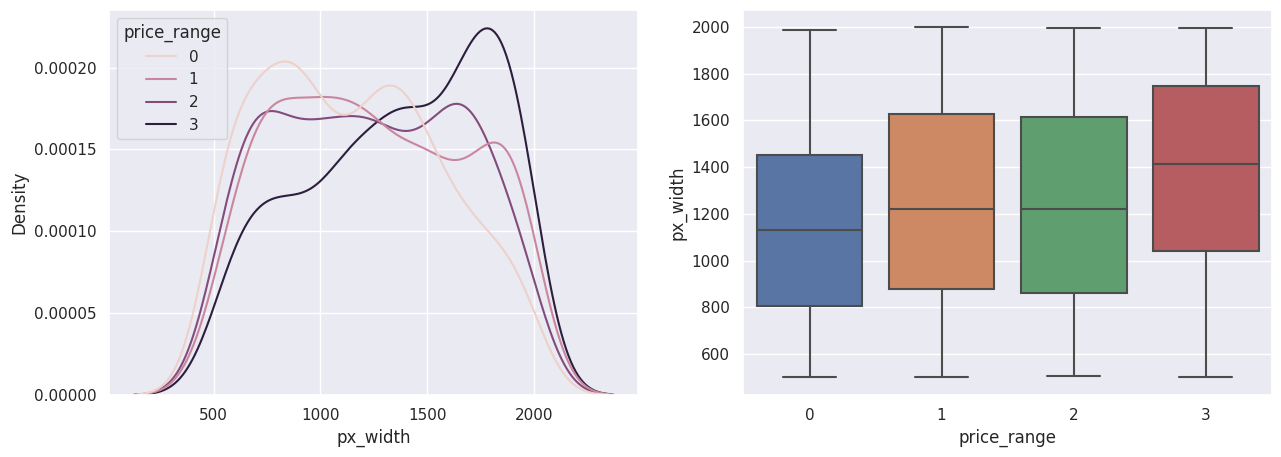

In [ ]:
fig, axs = plt.subplots(1,2, figsize=(15,5))
sns.kdeplot(data=df, x='px_width', hue='price_range', ax=axs[0])
sns.boxplot(data=df, x='price_range', y='px_width', ax=axs[1])
plt.show()

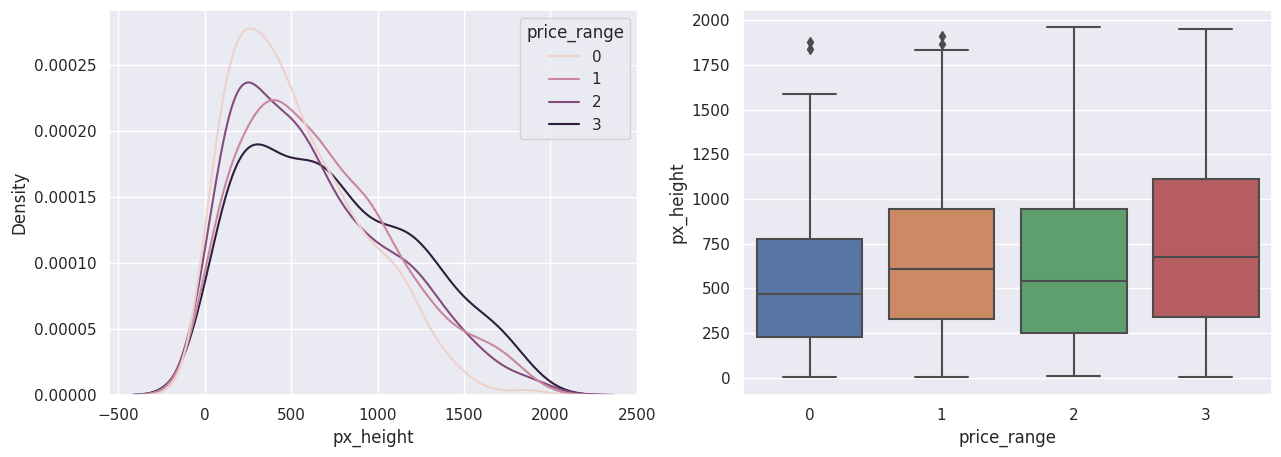

In [ ]:

fig, axs = plt.subplots(1,2, figsize=(15,5))
sns.kdeplot(data=df, x='px_height', hue='price_range', ax=axs[0])
sns.boxplot(data=df, x='price_range', y='px_height', ax=axs[1])
plt.show()

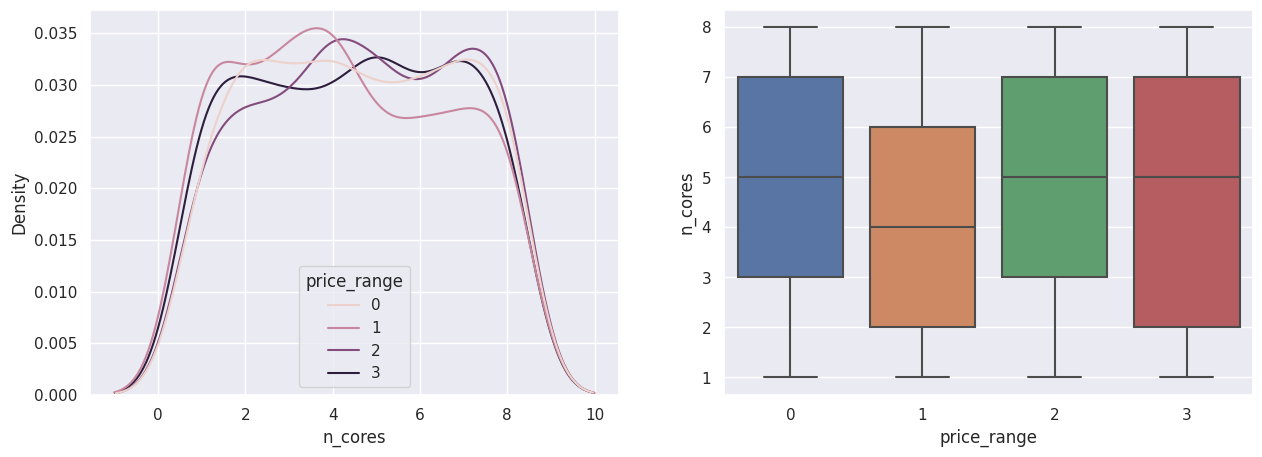

In [ ]:

fig, axs = plt.subplots(1,2, figsize=(15,5))
sns.kdeplot(data=df, x='n_cores', hue='price_range', ax=axs[0])
sns.boxplot(data=df, x='price_range', y='n_cores', ax=axs[1])
plt.show()

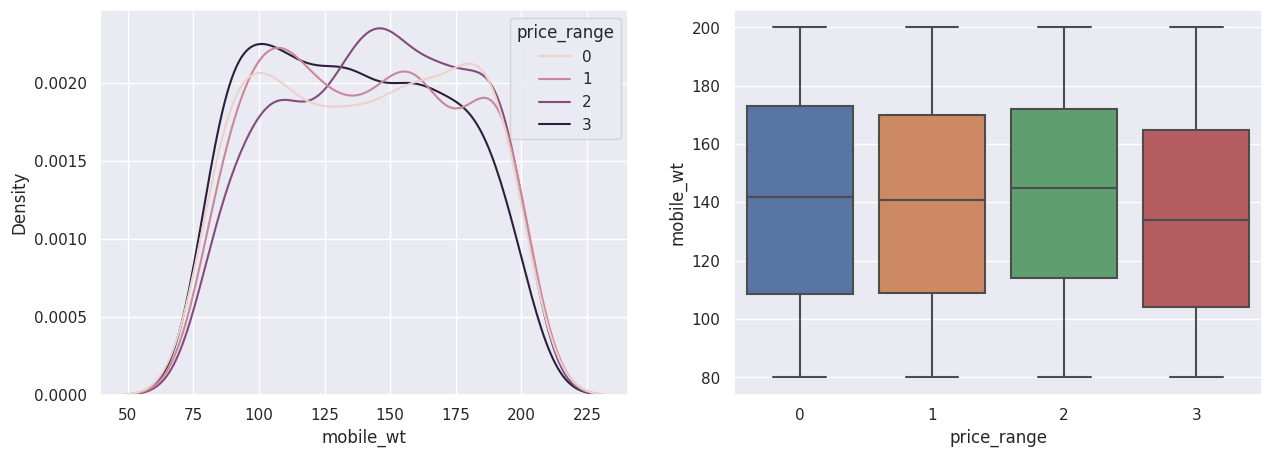

In [ ]:
fig, axs = plt.subplots(1,2, figsize=(15,5))
sns.kdeplot(data=df, x='mobile_wt', hue='price_range', ax=axs[0])
sns.boxplot(data=df, x='price_range', y='mobile_wt', ax=axs[1])
plt.show()

##### 1. Why did you pick the specific chart?

Kdeplot can plot the distribution of a continuous variable in a smooth curve, which can help you quickly understand the shape of the distribution, such as whether it is symmetric or skewed, and the location of the central tendency, such as the mean or median.<br>
Boxplot can help you identify any outliers in the data. Outliers are values that are much larger or smaller than the majority of the data points, and they can have a significant impact on statistical analyses, such as the mean or standard deviation. boxplot can plot these outliers as separate points, allowing you to quickly identify them.

##### 2. What is/are the insight(s) found from the chart?

* Sales and Customer scatter plot shows a direct positive relation between them with a few outliers.
* From the above scatter plot it can be observed that mostly the competitor stores weren't that far from each other and the stores densely located near each other saw more sales.

#### Chart - 8 - Pie chart on Categorical variables four_g and three-g 

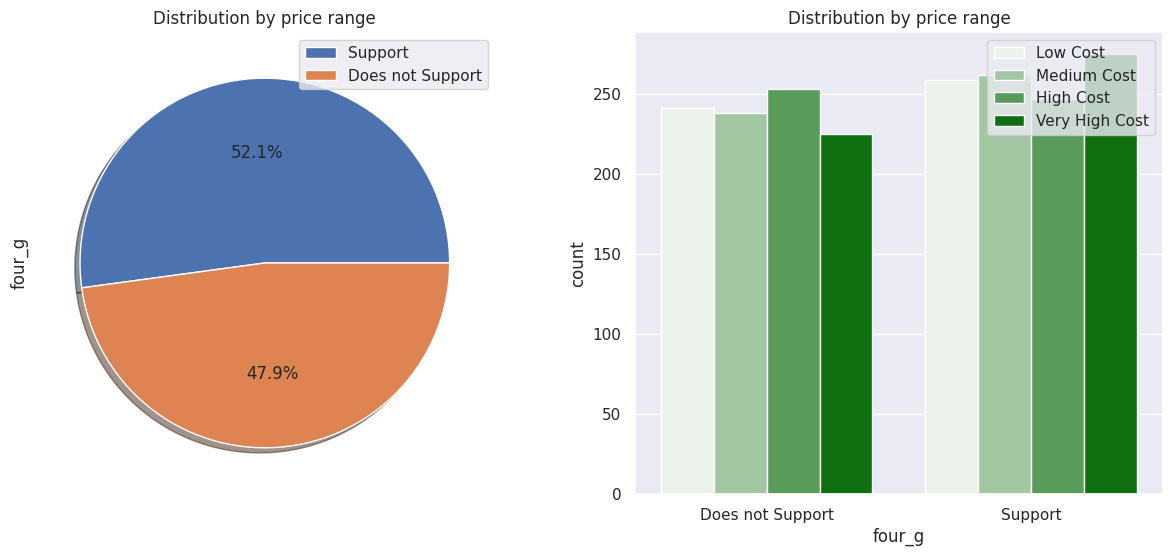

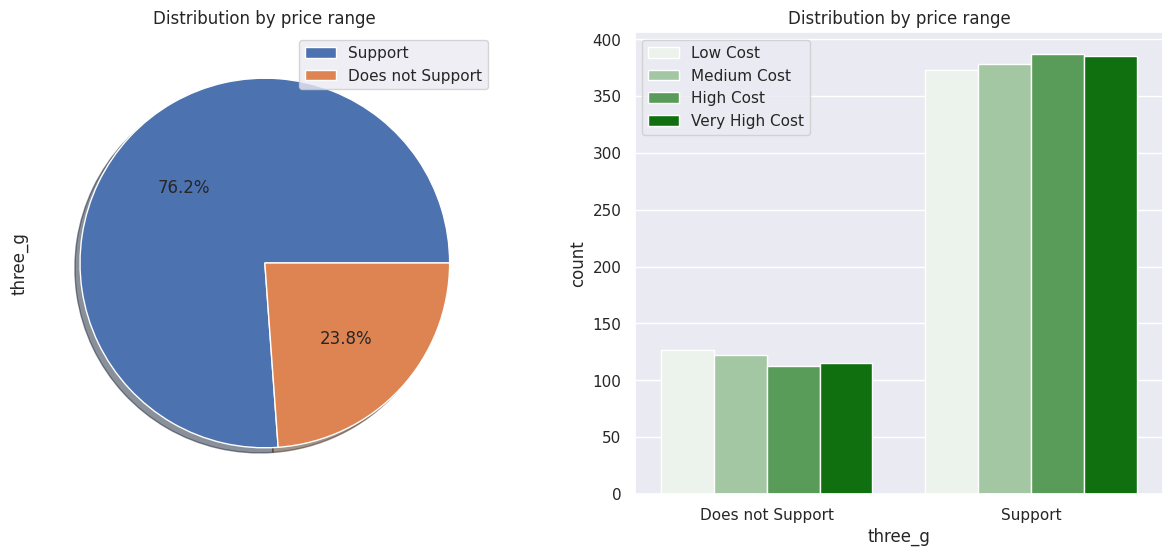

In [ ]:
# Plot of binary features against price range
binary_features = [ 'four_g', 'three_g']
for col in binary_features:
  fig, (ax1, ax2) = plt.subplots(ncols = 2, figsize = (15, 6))

  df[col].value_counts().plot.pie (autopct='%1.1f%%', ax = ax1, shadow=True, labeldistance=None)
  ax1.set_title('Distribution by price range')
  ax1.legend(['Support', 'Does not Support'])
  sns.countplot(x = col, hue = 'price_range', data = df, ax = ax2, color = 'green')
  ax2.set_title('Distribution by price range')
  ax2.set_xlabel(col)
  ax2.legend(['Low Cost', 'Medium Cost', 'High Cost', 'Very High Cost'])
  ax2.set_xticklabels(['Does not Support', 'Support'])

##### 1. Why did you pick the specific chart?

A pie chart expresses a part-to-whole relationship in your data. It's easy to explain the percentage comparison through area covered in a circle with different colors. Where differenet percentage comparison comes into action pie chart is used frequently. So, I used Pie chart and which helped me to get the percentage comparision of the dependant variable. <br>
countplot can count the number of occurrences of each category in a categorical variable and plot the counts as bars. This can help you quickly understand the distribution of the data and identify any imbalances or biases.<br>
countplot can also group the counts of different categories and plot them side-by-side, which allows you to compare the frequencies of different categories easily. This is useful when you want to compare the frequency of different categories across a dataset or between different datasets.

##### 2. What is/are the insight(s) found from the chart?

From the above chart we can see ,
Feature 'three_g' play an important feature in prediction

#### Chart - 9 - Correlation Heatmap

<Axes: >

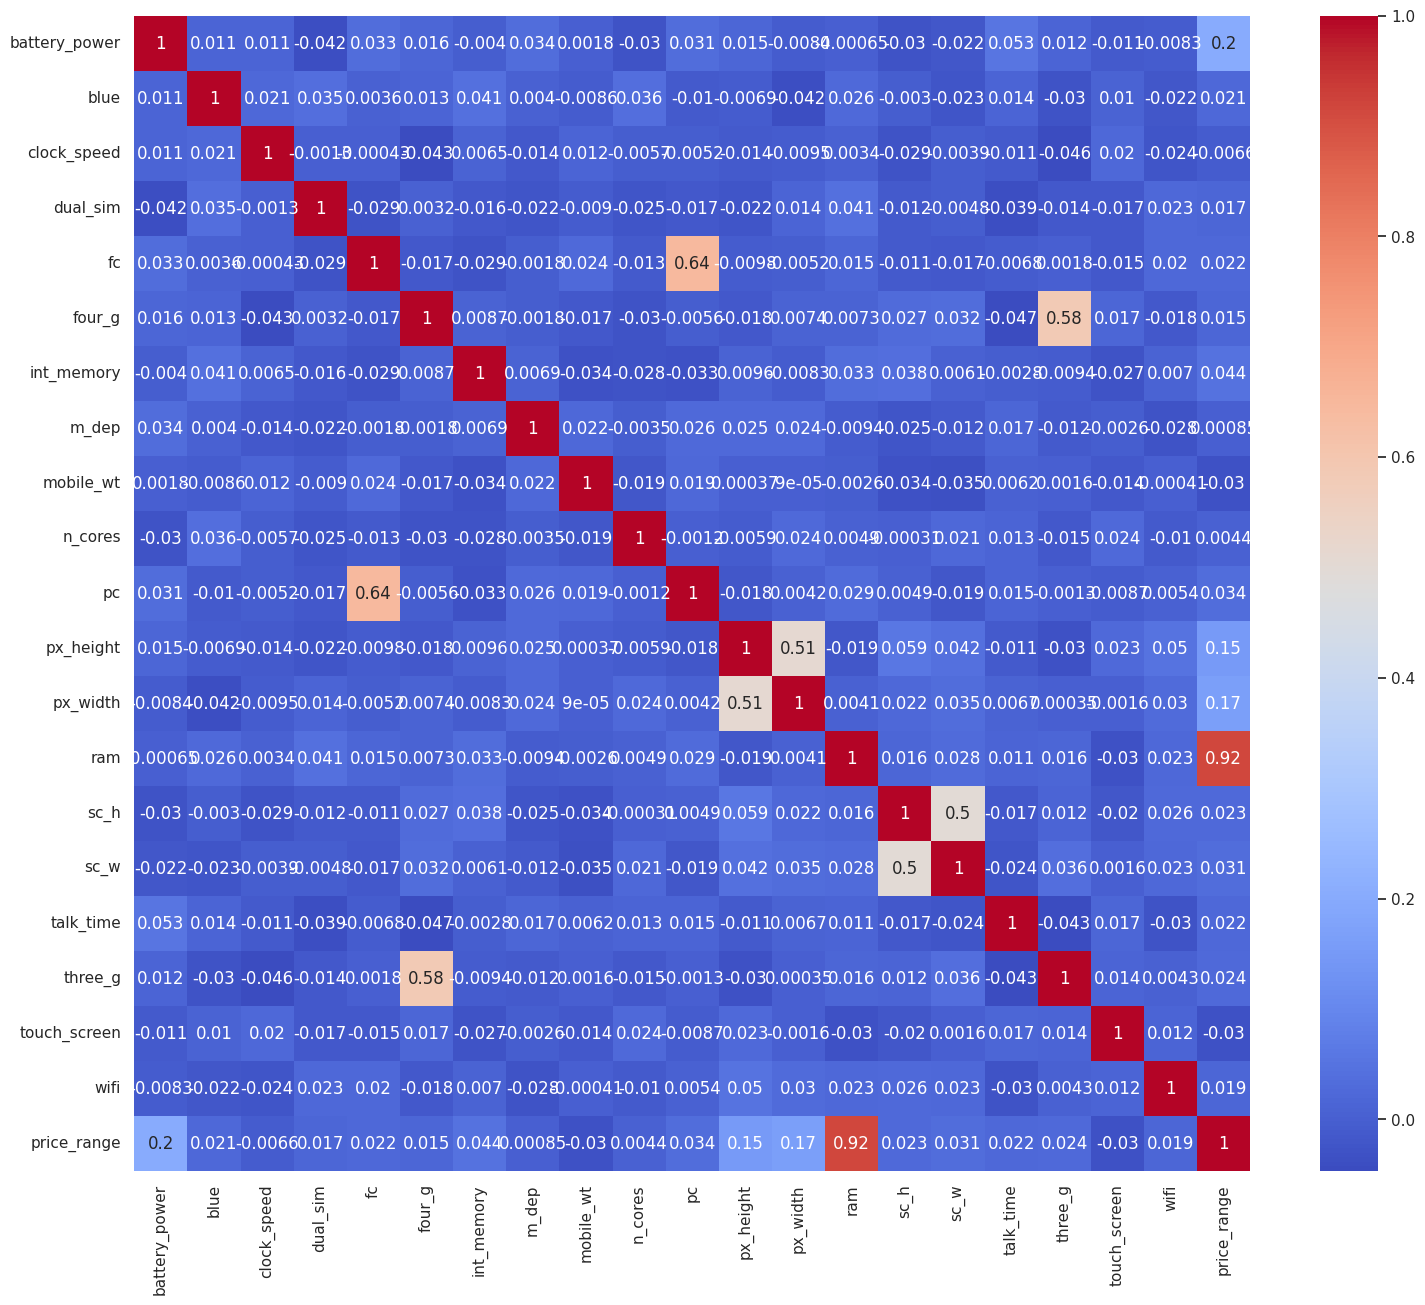

In [ ]:
# Checking for multi-collinearity

correlation = df.corr()
plt.figure(figsize = [18, 15])
sns.heatmap(correlation, cmap = 'coolwarm', annot = True)

<Axes: >

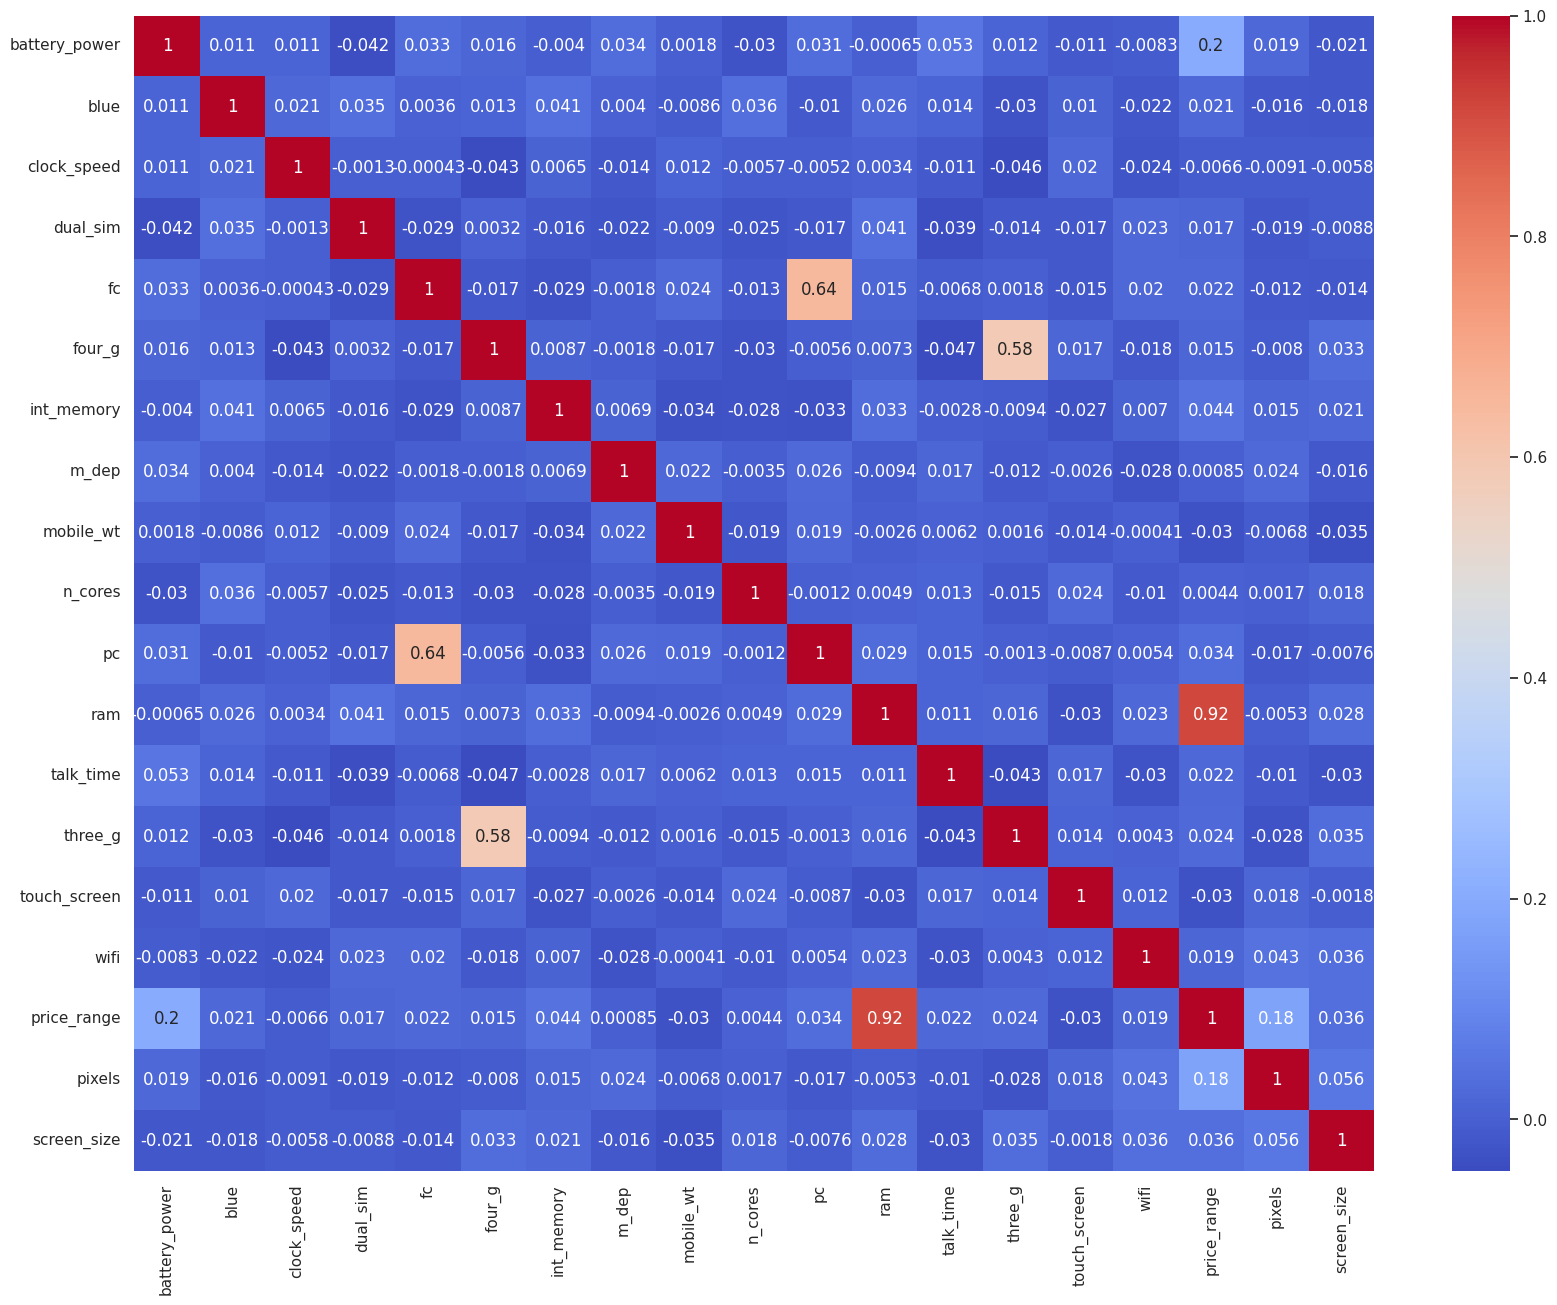

In [ ]:
#  defining new variable for pixels and screen size

df['pixels'] = df['px_height']*df['px_width']
df['screen_size'] = df['sc_h']*df['sc_w']
# Dropping px_height , px_width , sc_h and sc_w
df.drop(['px_height', 'px_width','sc_h','sc_w'], axis = 1, inplace = True)
# Checking for multi-collinearity

correlation = df.corr()
plt.figure(figsize = [20, 15])
sns.heatmap(correlation, cmap = 'coolwarm', annot = True)

##### 1. Why did you pick the specific chart?

A correlation matrix is a table showing correlation coefficients between variables. Each cell in the table shows the correlation between two variables. A correlation matrix is used to summarize data, as an input into a more advanced analysis, and as a diagnostic for advanced analyses. The range of correlation is [-1,1].

Thus to know the correlation between all the variables along with the correlation coeficients, i used correlation heatmap.

##### 2. What is/are the insight(s) found from the chart?

From the above charts we can see ,<br>
* RAM and price_range shows high correlation which is a good sign, it signifies that RAM will play major deciding factor in estimating the price range.

* There is some collinearity in feature pairs ('pc', 'fc') and ('px_width', 'px_height'). Both correlations are justified since there are good chances that if front camera of a phone is good, the back camera would also be good.

* Also, if px_height increases, pixel width also increases, that means the overall pixels in the screen. We can replace these two features with one feature. Front Camera megapixels and Primary camera megapixels are different entities despite of showing colinearity. So we'll be keeping them as they are.

## ***5. Feature Engineering & Data Pre-processing***

In [ ]:
columns = df.describe().columns.tolist()
col = columns.remove('price_range')
columns.append('price_range')
df1=df[columns]


In [ ]:
df1.columns

Index(['battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc', 'four_g',
       'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'ram', 'talk_time',
       'three_g', 'touch_screen', 'wifi', 'pixels', 'screen_size',
       'price_range'],
      dtype='object')

### 1. Handling Missing Values

battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
ram              0
talk_time        0
three_g          0
touch_screen     0
wifi             0
pixels           0
screen_size      0
price_range      0
dtype: int64


<Axes: >

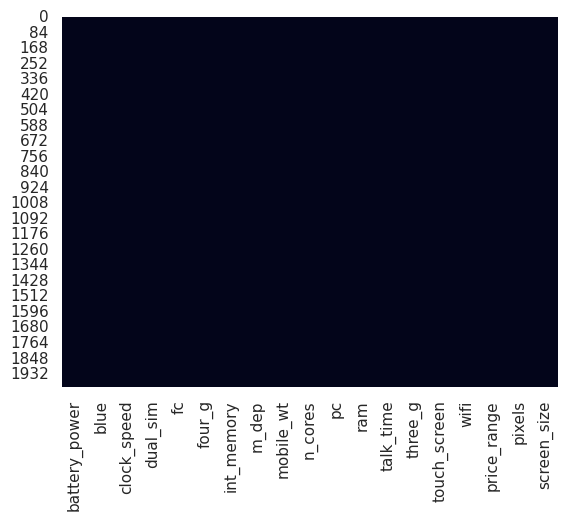

In [ ]:
# Handling Missing Values & Missing Value Imputation
# Missing Values/Null Values Count
print(df1.isnull().sum())

# Visualizing the missing values
# Checking Null Value by plotting Heatmap
sns.heatmap(df.isnull(), cbar=False)

#### What all missing value imputation techniques have you used and why did you use those techniques?

There are no missing values to handle in the given dataset.

### 2. Handling Outliers

In [ ]:
numerical_columns = ['battery_power', 'clock_speed', 'fc',
       'int_memory', 'm_dep', 'mobile_wt', 'pc', 'ram', 'talk_time',
       'pixels', 'screen_size'
      ]
for col in numerical_columns:
  q1 = df1[col].quantile(0.25)
  q3 = df1[col].quantile(0.75)
  iqr = q3-q1
  minimum = q1 - 1.5 * iqr
  maximum = q3 + 1.5 * iqr
  print("Number of outliers in in the column " ,col ," is  :",len(df1[(df1[col]<minimum) | (df1[col]>maximum)]))

Number of outliers in in the column  battery_power  is  : 0
Number of outliers in in the column  clock_speed  is  : 0
Number of outliers in in the column  fc  is  : 18
Number of outliers in in the column  int_memory  is  : 0
Number of outliers in in the column  m_dep  is  : 0
Number of outliers in in the column  mobile_wt  is  : 0
Number of outliers in in the column  pc  is  : 0
Number of outliers in in the column  ram  is  : 0
Number of outliers in in the column  talk_time  is  : 0
Number of outliers in in the column  pixels  is  : 61
Number of outliers in in the column  screen_size  is  : 73


##### What all outlier treatment techniques have you used and why did you use those techniques?

The technique which I used to detect outliers is Inter quantile range . Because of from this we can know the minimum and maximum values of the columns from that the values less than minimum or greater than maximum are stated as outliers .

 distribution:
1.	lower inner fence: Q1–1.5*IQ
2.	upper inner fence: Q3 + 1.5*IQ
3.	lower outer fence: Q1–3*IQ
4.	upper outer fence: Q3 + 3*IQ


In the given data almost all numerical columns have no outliers except the columns pixel and screen size .These two variables are newly added by using the variables pixel and screen heights and witdths .
So , the values in the pixels and screen size doesn't effect the data as per business logic .

### 3. Categorical Encoding

In [ ]:
for col in categorical_variables:
  print(df1[col].value_counts())

0    1010
1     990
Name: blue, dtype: int64
1    1019
0     981
Name: dual_sim, dtype: int64
1    1043
0     957
Name: four_g, dtype: int64
4    274
7    259
8    256
2    247
3    246
5    246
1    242
6    230
Name: n_cores, dtype: int64
1    1523
0     477
Name: three_g, dtype: int64
1    1006
0     994
Name: touch_screen, dtype: int64
1    1014
0     986
Name: wifi, dtype: int64


#### What all categorical encoding techniques have you used & why did you use those techniques?

In the given data all the categorical variables are binary variables and also all the values in these categorical variables are like either 0 or 1 . It seems to be all are encoded properly as per business logic .So, no need to encode the categorical variables .

### 4. Feature Manipulation & Selection

#### 1. Feature Manipulation

In [ ]:
df1.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,ram,talk_time,three_g,touch_screen,wifi,pixels,screen_size,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,2,2549,19,0,0,1,15120.0,63.0,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,6,2631,7,1,1,0,1799140.0,51.0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,6,2603,9,1,1,0,2167308.0,22.0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,9,2769,11,1,0,0,2171776.0,128.0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,14,1411,15,1,1,0,1464096.0,16.0,1


From the above data we can see , all the variables or features are well known also that the dataset seems to be ready to train the model . So , no need to manipulate any feature .

### 5. Data Transformation

From the dataset we can conclude that the target have discrete values and those values are in proper range . So , need to transform any feature .

### 6. Data Scaling

In [ ]:
# Defining X and y

X = df1.drop(['price_range'], axis = 1)
y = df1[['price_range']]

In [ ]:
# Scaling values of X

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

##### Which method have you used to scale you data and why?

MinMaxScaler is a data normalization technique that scales and transforms data features so that they fall within a specified range, typically between 0 and 1. This scaler is widely used in machine learning to preprocess data .

### 8. Data Splitting

In [ ]:
# Split your data to train and test. Choose Splitting ratio wisely.
# Split your data to train and test. Choose Splitting ratio wisely.
 # split into 70:30 ratio
# Splitting dataset into train and test sets

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size = 0.20, random_state = 42,stratify = y)
     
  

##### What data splitting ratio have you used and why? 

Train-test split is a common technique used in machine learning to evaluate the performance of a model on unseen data. The basic idea is to split the available dataset into two parts: a training set and a test set. The model is trained on the training set and evaluated on the test set.



### 9. Handling Imbalanced Dataset

In [ ]:
s = pd.DataFrame({'price':y_train['price_range']})
s['price'].value_counts()

1    400
0    400
3    400
2    400
Name: price, dtype: int64

In [ ]:
t = pd.DataFrame({'price':y_test['price_range']})
t['price'].value_counts()

3    100
1    100
0    100
2    100
Name: price, dtype: int64

##### Do you think the dataset is imbalanced? Explain Why.

From the above data we can say , our dataset is balanced dataset . Because of the number of instances in each levels of target variable are almost same or all are in same ratio . So , no need to do use any undersmpling or oversampling techniques .

## ***6. ML Model Implementation***

In [ ]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

In [ ]:
def Classification_Report(algo_name,type, y,y_pred):
  print(f'Classification report for {algo_name} ({type} set)= ')
  print(classification_report(y_pred,y))



In [ ]:
def Confusion_Matrix(algo_name,type,y,y_pred):
  #Generate the confusion matrix
  cf_matrix = confusion_matrix(y,y_pred)
  print(f'Classification report for {algo_name} ({type} set)= ')
  print(" ")
  print(cf_matrix)

  ax = sns.heatmap(cf_matrix, annot=True, cmap='Blues')

  ax.set_title('Seaborn Confusion Matrix with labels\n\n');
  ax.set_xlabel('\nPredicted Values')
  ax.set_ylabel('Actual Values ');

  ## Ticket labels - List must be in alphabetical order
  ax.xaxis.set_ticklabels([0,1,2,3])
  ax.yaxis.set_ticklabels([0,1,2,3])

  ## Display the visualization of the Confusion Matrix.
  plt.show()


### ML Model - 1 - **Implementing Logistic Regression**

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
# ML Model - 1 Implementation
lr = LogisticRegression(fit_intercept=True, max_iter=10000)
# Fit the Algorithm
lr.fit(X_train, y_train)

LogisticRegression(max_iter=10000)

In [ ]:
# Get the predicted classes
y_pred_train = lr.predict(X_train)
y_pred_test = lr.predict(X_test)

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [ ]:
# classification report for logistic regression on train data
Classification_Report('Logistic Regression','Train',y_train,y_pred_train)

Classification report for Logistic Regression (Train set)= 
              precision    recall  f1-score   support

           0       0.97      0.93      0.95       416
           1       0.86      0.89      0.87       388
           2       0.84      0.89      0.87       378
           3       0.96      0.92      0.94       418

    accuracy                           0.91      1600
   macro avg       0.91      0.91      0.91      1600
weighted avg       0.91      0.91      0.91      1600



In [ ]:
# classification report for logistic regression on test data
Classification_Report('Logistic Regression','Test',y_test,y_pred_test)

Classification report for Logistic Regression (Test set)= 
              precision    recall  f1-score   support

           0       0.97      0.95      0.96       102
           1       0.85      0.86      0.85        99
           2       0.80      0.82      0.81        97
           3       0.93      0.91      0.92       102

    accuracy                           0.89       400
   macro avg       0.89      0.89      0.89       400
weighted avg       0.89      0.89      0.89       400



Classification report for Logistic Regression (Train set)= 
 
[[387  13   0   0]
 [ 29 344  27   0]
 [  0  31 337  32]
 [  0   0  14 386]]


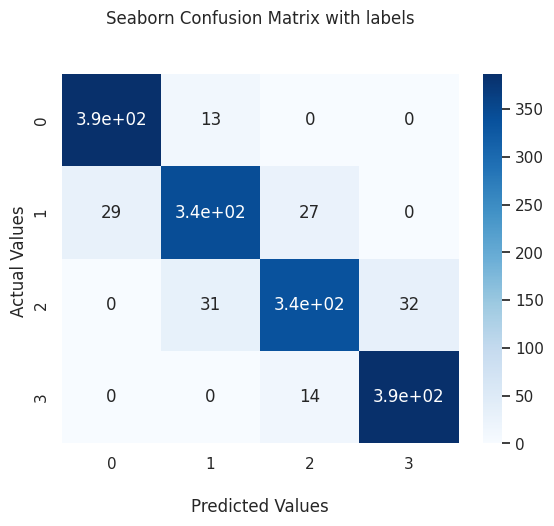

In [ ]:
# confusion matrix for logistic regression on train data
Confusion_Matrix('Logistic Regression','Train',y_train,y_pred_train)

Classification report for Logistic Regression (Test set)= 
 
[[97  3  0  0]
 [ 5 85 10  0]
 [ 0 11 80  9]
 [ 0  0  7 93]]


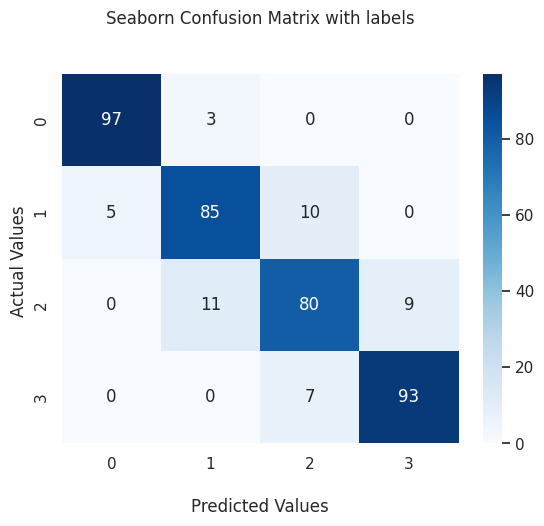

In [ ]:
# confusion matrix for logistic regression on test data
Confusion_Matrix('Logistic Regression','Test',y_test,y_pred_test)

From the above classification report and confusion matrix ,<br>
* Train data accuracy is 0.91<br>
* Test data accuracy is 0.89<br>
The logistic regression performing well on both train data and test data .But , here we would try to increase the performance on test data also .
So, lets try other methods to improve the performance .


### ML Model - 2 - **Implementing Decision Tree Classifier**

In [ ]:

from sklearn.tree import DecisionTreeClassifier

In [ ]:
# ML Model - 2 Implementation
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)

DecisionTreeClassifier()

In [ ]:
# Calculating accuracy on train and test
y_pred_train = dt.predict(X_train)
y_pred_test = dt.predict(X_test)

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [ ]:

# classification report for decision tree on train data
Classification_Report('Decision Tree','Train',y_train,y_pred_train)

Classification report for Decision Tree (Train set)= 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       400
           1       1.00      1.00      1.00       400
           2       1.00      1.00      1.00       400
           3       1.00      1.00      1.00       400

    accuracy                           1.00      1600
   macro avg       1.00      1.00      1.00      1600
weighted avg       1.00      1.00      1.00      1600



In [ ]:
# classification report for Decision Tree on test data
Classification_Report('Decision Tree','Test',y_test,y_pred_test)

Classification report for Decision Tree (Test set)= 
              precision    recall  f1-score   support

           0       0.95      0.97      0.96        98
           1       0.81      0.84      0.82        97
           2       0.79      0.77      0.78       102
           3       0.93      0.90      0.92       103

    accuracy                           0.87       400
   macro avg       0.87      0.87      0.87       400
weighted avg       0.87      0.87      0.87       400



Classification report for Decision Tree (Train set)= 
 
[[400   0   0   0]
 [  0 400   0   0]
 [  0   0 400   0]
 [  0   0   0 400]]


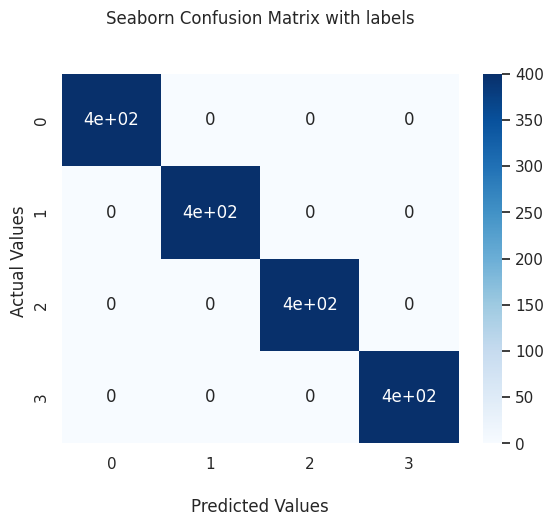

In [ ]:
# confusion matrix for decision tree on train data
Confusion_Matrix('Decision Tree','Train',y_train,y_pred_train)


Classification report for Decision Tree (Test set)= 
 
[[95  5  0  0]
 [ 3 81 16  0]
 [ 0 11 79 10]
 [ 0  0  7 93]]


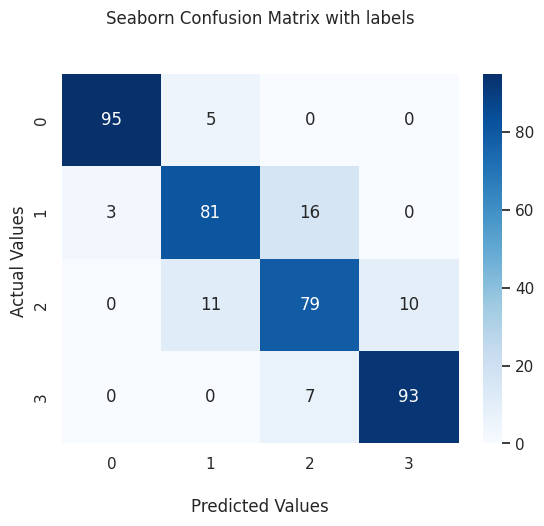

In [ ]:
# confusion matrix for decision tree on test data
Confusion_Matrix('Decision Tree','Test',y_test,y_pred_test)

From the above classification report and confusion matrix ,

* Train data accuracy is 1
* Test data accuracy is 0.87 <br>
* The Decision tree algorithm performing well on training but not performing well on testing data . This leads to overfitting of the model . So, decision tree algorithm does not give genralised model for our dataset . So, lets go with other algorithm .

### ML Model - 3 - **Implementing Random Forest Classifier**

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
# ML Model - 2 Implementation
# Create an instance of the RandomForestClassifier
rf = RandomForestClassifier(n_estimators=300)
rf.fit(X_train, y_train)

RandomForestClassifier(n_estimators=300)

In [ ]:
# Calculating accuracy on train and test
y_pred_train = rf.predict(X_train)
y_pred_test = rf.predict(X_test)

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [ ]:

# classification report for Random Forest Classifier on train data
Classification_Report('Random Forest','Train',y_train,y_pred_train)


Classification report for Random Forest (Train set)= 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       400
           1       1.00      1.00      1.00       400
           2       1.00      1.00      1.00       400
           3       1.00      1.00      1.00       400

    accuracy                           1.00      1600
   macro avg       1.00      1.00      1.00      1600
weighted avg       1.00      1.00      1.00      1600



In [ ]:

# classification report for Random Forest Classifier on test data
Classification_Report('Random Forest','Test',y_test,y_pred_test)

Classification report for Random Forest (Test set)= 
              precision    recall  f1-score   support

           0       0.98      0.95      0.97       103
           1       0.83      0.86      0.85        96
           2       0.82      0.80      0.81       102
           3       0.92      0.93      0.92        99

    accuracy                           0.89       400
   macro avg       0.89      0.89      0.89       400
weighted avg       0.89      0.89      0.89       400



Classification report for Random FOrest (Train set)= 
 
[[400   0   0   0]
 [  0 400   0   0]
 [  0   0 400   0]
 [  0   0   0 400]]


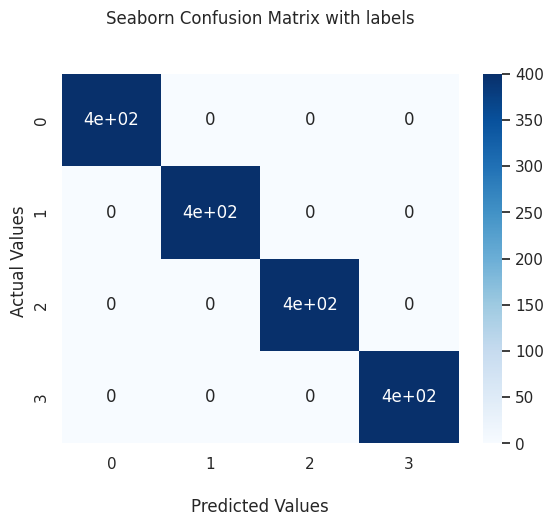

In [ ]:
# confusion matrix for Random Forest on train data
Confusion_Matrix('Random Forest','Train',y_train,y_pred_train)


Classification report for Random Forest (Test set)= 
 
[[98  2  0  0]
 [ 5 83 12  0]
 [ 0 11 82  7]
 [ 0  0  8 92]]


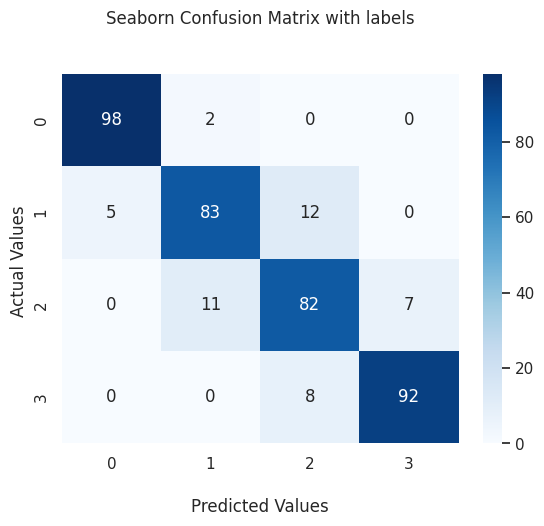

In [ ]:
# confusion matrix for Random Forest on test data
Confusion_Matrix('Random Forest','Test',y_test,y_pred_test)

From the above classification report and confusion matrix ,

* Train data accuracy is 1
* Test data accuracy is 0.89
* The random Forest algorithm performing well on training but not performing well on testing data . This leads to overfitting of the model . So, lets try to tune the hyper parameters to increase the performance of the model .

#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# ML Model - 3 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)
from sklearn.model_selection import GridSearchCV
params = {'n_estimators':[10,50,100,200],
          'max_depth':[10,20,30,40],
           'min_samples_split':[2,4,6],
          'max_features':['sqrt',4,'log2','auto'],
          'max_leaf_nodes':[10, 20, 40]
          }
rf = RandomForestClassifier()
rft = GridSearchCV(rf, params, scoring='accuracy', cv=3)
rft.fit(X_train, y_train)


GridSearchCV(cv=3, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [10, 20, 30, 40],
                         'max_features': ['sqrt', 4, 'log2', 'auto'],
                         'max_leaf_nodes': [10, 20, 40],
                         'min_samples_split': [2, 4, 6],
                         'n_estimators': [10, 50, 100, 200]},
             scoring='accuracy')

In [ ]:
rft.best_params_

{'max_depth': 10,
 'max_features': 4,
 'max_leaf_nodes': 40,
 'min_samples_split': 2,
 'n_estimators': 100}

In [ ]:
# Calculating accuracy on train and test
y_pred_train = rft.predict(X_train)
y_pred_test = rft.predict(X_test)

In [ ]:
# classification report for Random Forest Classifier tuned on train data
Classification_Report('Random Forest Tuned','Train',y_train,y_pred_train)

Classification report for Random Forest Tuned (Train set)= 
              precision    recall  f1-score   support

           0       0.96      0.94      0.95       409
           1       0.89      0.89      0.89       401
           2       0.90      0.94      0.92       385
           3       0.99      0.98      0.98       405

    accuracy                           0.94      1600
   macro avg       0.94      0.94      0.94      1600
weighted avg       0.94      0.94      0.94      1600



In [ ]:
# classification report for Random Forest Classifier Tuned on test data
Classification_Report('Random Forest Tuned','Test',y_test,y_pred_test)

Classification report for Random Forest Tuned (Test set)= 
              precision    recall  f1-score   support

           0       0.95      0.92      0.94       103
           1       0.79      0.77      0.78       102
           2       0.77      0.80      0.79        96
           3       0.94      0.95      0.94        99

    accuracy                           0.86       400
   macro avg       0.86      0.86      0.86       400
weighted avg       0.86      0.86      0.86       400



Classification report for Random Forest Tuned (Train set)= 
 
[[385  15   0   0]
 [ 24 356  20   0]
 [  0  30 361   9]
 [  0   0   4 396]]


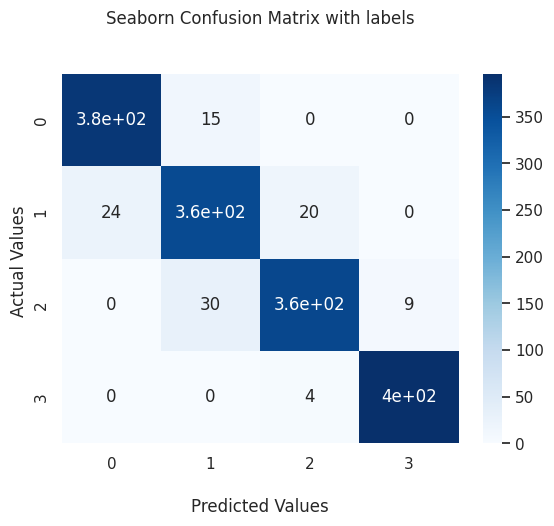

In [ ]:
# confusion matrix for Random Forest Tuned on train data
Confusion_Matrix('Random Forest Tuned','Train',y_train,y_pred_train)

Classification report for Random Forest Tuned (Test set)= 
 
[[95  5  0  0]
 [ 8 79 13  0]
 [ 0 18 77  5]
 [ 0  0  6 94]]


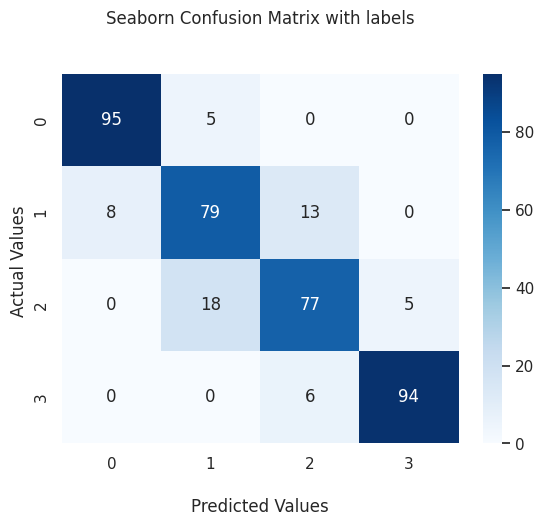

In [ ]:
# confusion matrix for Random Forest Tuned on test data
Confusion_Matrix('Random Forest Tuned','Test',y_test,y_pred_test)

From the above classification report and confusion matrix ,

* Train data accuracy is 0.94
* Test data accuracy is 0.86
* The Random Forest tuned algorithm performing well on training but not performing well on testing data . This leads to overfitting of the model . So, lets try with another method .

##### Which hyperparameter optimization technique have you used and why?

GridSearchCV which uses the Grid Search technique for finding the optimal hyperparameters to increase the model performance.

our goal should be to find the best hyperparameters values to get the perfect prediction results from our model.  But the question arises, how to find these best sets of hyperparameters? One can try the Manual Search method, by using the hit and trial process and can find the best hyperparameters which would take huge time to build a single model.

For this reason, methods like Random Search, GridSearch were introduced. 
Grid Search uses a different combination of all the specified hyperparameters and their values and calculates the performance for each combination and selects the best value for the hyperparameters. This makes the processing time-consuming and expensive based on the number of hyperparameters involved.

In GridSearchCV, along with Grid Search, cross-validation is also performed. Cross-Validation is used while training the model. 

That's why I have used GridsearCV method for hyperparameter optimization.

### ML Model - 4 - **Implementing XgBoost Classifier**

In [ ]:
from xgboost import XGBClassifier

In [ ]:
# ML Model - 2 Implementation
# Create an instance of the RandomForestClassifier

xgb = XGBClassifier(max_depth = 5, learning_rate = 0.1)
xgb.fit(X_train, y_train)
XGBClassifier(max_depth=5, objective='multi:softprob')

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=5, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              objective='multi:softprob', predictor=None, ...)

In [ ]:
y_pred_train = xgb.predict(X_train)
y_pred_test = xgb.predict(X_test)

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [ ]:

# classification report for XGBoost Classifier  on train data
Classification_Report('XGBoost','Train',y_train,y_pred_train)

Classification report for XGBoost (Train set)= 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       400
           1       1.00      1.00      1.00       401
           2       1.00      1.00      1.00       399
           3       1.00      1.00      1.00       400

    accuracy                           1.00      1600
   macro avg       1.00      1.00      1.00      1600
weighted avg       1.00      1.00      1.00      1600



In [ ]:

# classification report for XGBoost Classifier  on test data
Classification_Report('XGBoost','Test',y_test,y_pred_test)

Classification report for XGBoost (Test set)= 
              precision    recall  f1-score   support

           0       0.96      0.97      0.96        99
           1       0.91      0.90      0.91       101
           2       0.88      0.88      0.88       100
           3       0.94      0.94      0.94       100

    accuracy                           0.92       400
   macro avg       0.92      0.92      0.92       400
weighted avg       0.92      0.92      0.92       400



Classification report for XGBoost (Train set)= 
 
[[400   0   0   0]
 [  0 400   0   0]
 [  0   1 399   0]
 [  0   0   0 400]]


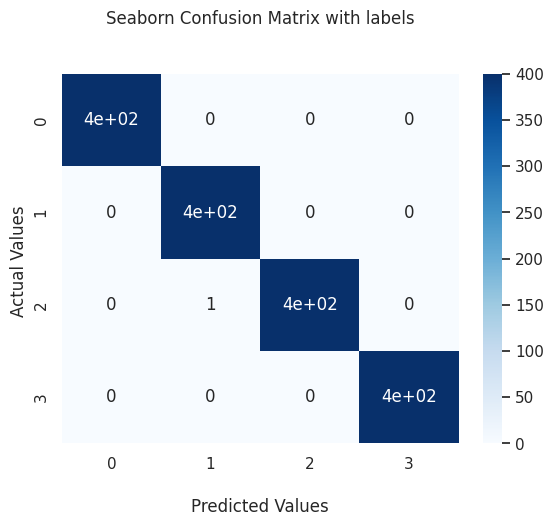

In [ ]:

# confusion matrix for XGBoost on train data
Confusion_Matrix('XGBoost','Train',y_train,y_pred_train)


Classification report for XGBoost (Test set)= 
 
[[96  4  0  0]
 [ 3 91  6  0]
 [ 0  6 88  6]
 [ 0  0  6 94]]


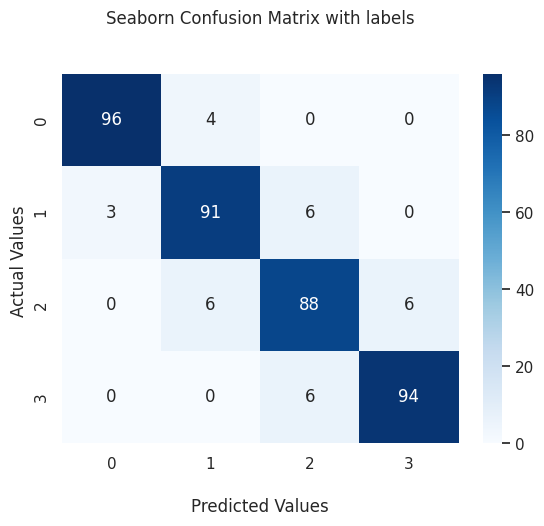

In [ ]:

# confusion matrix for XGBoost on test data
Confusion_Matrix('XGBoost','Test',y_test,y_pred_test)

From the above classification report and confusion matrix ,

* Train data accuracy is 1
* Test data accuracy is 0.92
* The XGBoost algorithm performing well on both training and testing data . It seems to be that this algorithm will give generalised model . So , lets tune this model .

#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
xgb_model = XGBClassifier()

In [ ]:


# Cross validation

xgbt = GridSearchCV(xgb_model, param_grid={'n_estimators': (10, 200), 'learning_rate': [1, 0.5, 0.1, 0.01, 0.001], 'max_depth': (5, 10),
                                     'gamma': [1.5, 1.8], 'subsample': [0.3, 0.5, 0.8]}, cv = 5, scoring = 'accuracy', verbose = 10)
xgbt.fit(X_train,y_train)

Fitting 5 folds for each of 120 candidates, totalling 600 fits
[CV 1/5; 1/120] START gamma=1.5, learning_rate=1, max_depth=5, n_estimators=10, subsample=0.3
[CV 1/5; 1/120] END gamma=1.5, learning_rate=1, max_depth=5, n_estimators=10, subsample=0.3;, score=0.872 total time=   0.1s
[CV 2/5; 1/120] START gamma=1.5, learning_rate=1, max_depth=5, n_estimators=10, subsample=0.3
[CV 2/5; 1/120] END gamma=1.5, learning_rate=1, max_depth=5, n_estimators=10, subsample=0.3;, score=0.822 total time=   0.1s
[CV 3/5; 1/120] START gamma=1.5, learning_rate=1, max_depth=5, n_estimators=10, subsample=0.3
[CV 3/5; 1/120] END gamma=1.5, learning_rate=1, max_depth=5, n_estimators=10, subsample=0.3;, score=0.822 total time=   0.1s
[CV 4/5; 1/120] START gamma=1.5, learning_rate=1, max_depth=5, n_estimators=10, subsample=0.3
[CV 4/5; 1/120] END gamma=1.5, learning_rate=1, max_depth=5, n_estimators=10, subsample=0.3;, score=0.847 total time=   0.1s
[CV 5/5; 1/120] START gamma=1.5, learning_rate=1, max_depth=5

GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     gpu_id=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None,...
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=100, n_jobs=None,
                                     num_parallel_tree=None, predictor=None,
                                     random_state=None, ...),
             param_grid={'gamma': [1.5, 1.8],
                         'learning_rate': [1, 0.5, 0.1, 0.01, 0.001],
                         'max_depth': (5, 10), 'n_estimators': (10, 200),
                         'subsample': [0.3, 0.5, 0.8]},
             scoring='accuracy', verbose=10)

In [ ]:
xgbt.best_params_

{'gamma': 1.5,
 'learning_rate': 0.1,
 'max_depth': 10,
 'n_estimators': 200,
 'subsample': 0.5}

In [ ]:
y_pred_train = xgb.predict(X_train)
y_pred_test = xgb.predict(X_test)

In [ ]:

# classification report for XGBoost Classifier tuned  on train data
Classification_Report('XGBoost Tuned','Train',y_train,y_pred_train)

Classification report for XGBoost Tuned (Train set)= 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       400
           1       1.00      1.00      1.00       401
           2       1.00      1.00      1.00       399
           3       1.00      1.00      1.00       400

    accuracy                           1.00      1600
   macro avg       1.00      1.00      1.00      1600
weighted avg       1.00      1.00      1.00      1600



In [ ]:
# classification report for XGBoost Classifier  tuned on test data
Classification_Report('XGBoost Tuned','Test',y_test,y_pred_test)

Classification report for XGBoost Tuned (Test set)= 
              precision    recall  f1-score   support

           0       0.96      0.97      0.96        99
           1       0.91      0.90      0.91       101
           2       0.88      0.88      0.88       100
           3       0.94      0.94      0.94       100

    accuracy                           0.92       400
   macro avg       0.92      0.92      0.92       400
weighted avg       0.92      0.92      0.92       400



Classification report for XGBoost Tuned (Train set)= 
 
[[400   0   0   0]
 [  0 400   0   0]
 [  0   1 399   0]
 [  0   0   0 400]]


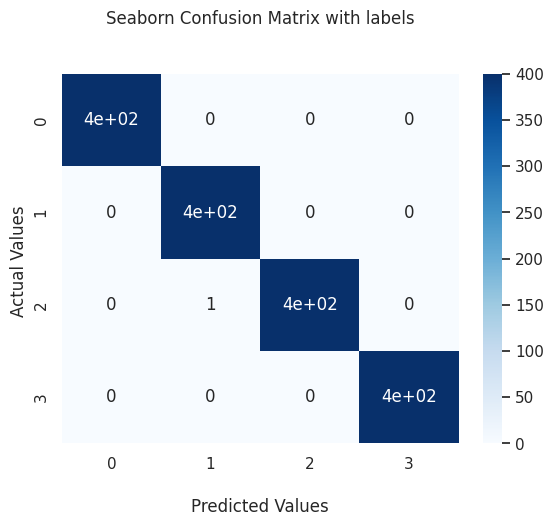

In [ ]:

# confusion matrix for XGBoost Tuned on train data
Confusion_Matrix('XGBoost Tuned','Train',y_train,y_pred_train)


Classification report for XGBoost Tuned (Test set)= 
 
[[96  4  0  0]
 [ 3 91  6  0]
 [ 0  6 88  6]
 [ 0  0  6 94]]


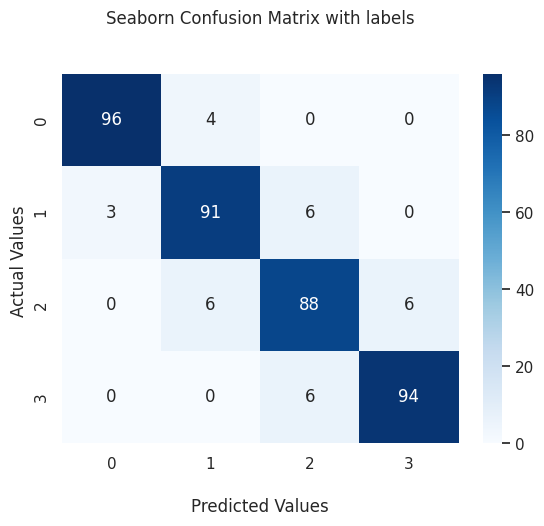

In [ ]:

# confusion matrix for XGBoost tuned on test data
Confusion_Matrix('XGBoost Tuned','Test',y_test,y_pred_test)

From the above classification report and confusion matrix ,

* Train data accuracy is 1
* Test data accuracy is 0.92
* The XGBoost tuned algorithm performing well on both training and testing data . It seems to be that this algorithm will give generalised model . 

**Feature Importance**

In [ ]:

feature_importance = pd.DataFrame({'Feature':X.columns,
                                   'Score':xgb.feature_importances_}).sort_values(by='Score', ascending=False).reset_index(drop=True)
feature_importance.head()

,Feature,Score
0,ram,0.422853
1,battery_power,0.120060
2,pixels,0.100143
3,blue,0.034098
4,mobile_wt,0.030240


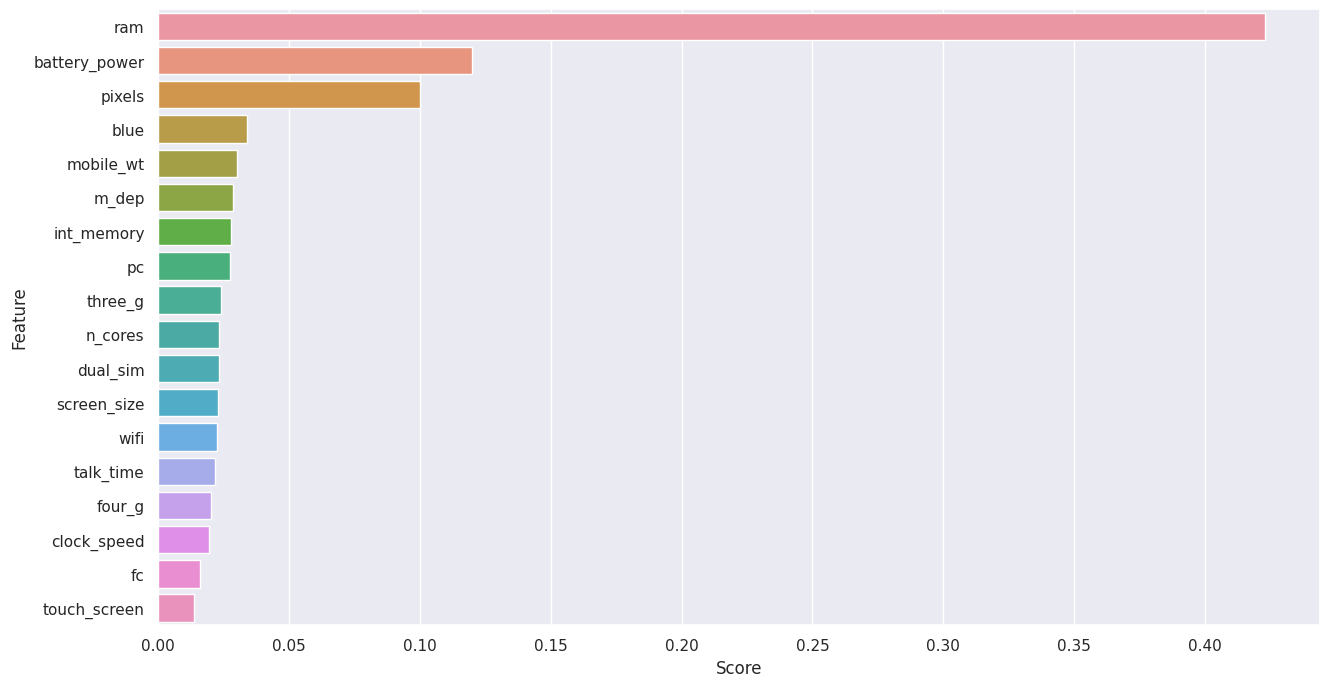

In [ ]:
fig, ax = plt.subplots(figsize=(15,8))
ax = sns.barplot(x=feature_importance['Score'], y=feature_importance['Feature'])
plt.show()

##### Which hyperparameter optimization technique have you used and why?

GridSearchCV which uses the Grid Search technique for finding the optimal hyperparameters to increase the model performance.

our goal should be to find the best hyperparameters values to get the perfect prediction results from our model.  But the question arises, how to find these best sets of hyperparameters? One can try the Manual Search method, by using the hit and trial process and can find the best hyperparameters which would take huge time to build a single model.

For this reason, methods like Random Search, GridSearch were introduced. 
Grid Search uses a different combination of all the specified hyperparameters and their values and calculates the performance for each combination and selects the best value for the hyperparameters. This makes the processing time-consuming and expensive based on the number of hyperparameters involved.

In GridSearchCV, along with Grid Search, cross-validation is also performed. Cross-Validation is used while training the model. 

That's why I have used GridsearCV method for hyperparameter optimization.

### 1. Which Evaluation metrics did you consider for a positive business impact and why?

I would like to go with Accuracy of the model .<br>
Accuracy is a commonly used metric in classification tasks because it gives a clear indication of how well the classifier is performing overall. Accuracy measures the proportion of correctly classified instances out of the total number of instances in the dataset.

### 2. Which ML model did you choose from the above created models as your final prediction model and why?

I can choose either of XGBoost classifier or XGBoost classifier tuned . Because both are giving generalised model with accuracy 0.92 . So , among all models I can choose XGBoost tuned model to the given dataset .

### 3. Explain the model which you have used and the feature importance using any model explainability tool?

For Feature Importance , I used feature importance from XG Boost . From this ,<br>
Ram , Battery Power and Pixels are showing maximum feature importance than another features .Where these features effecting more on the range of the prices .

# **Conclusion**

* From EDA we can see that here are mobile phones in 4 price ranges. The number of elements is almost similar.
* Half the devices have Bluetooth, and half don’t
there is a gradual increase in battery as the price range increases
* Ram has continuous increase with price range while moving from Low cost to Very high cost
* costly phones are lighter
* RAM, battery power, pixels played more significant role in deciding the price range of mobile phone.
* Form all the above experiments we can conclude that  XGboosting with using hyperparameters we got the best results .
